# Сборный проект. Анализ компьютерных игр для интернет-магазина.

Необходимо провести анализ исторических данных о продажах игр, оценки пользователей и экспертов, жанров и платформы для 
интернет-магазина «Стримчик». Нашей задачей является выявление определяющих успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У нас имеются данные до 2016 года. Пусть сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

***Описание данных***

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

* [Шаг 1. Откройте файл с данными и изучите общую информацию.](#step1)
* [Шаг 2. Подготовьте данные](#step2)
* [Шаг 3. Проведите исследовательский анализ данных](#step3)
* [Шаг 4. Составьте портрет пользователя каждого региона](#step4)
* [Шаг 5. Проверьте гипотезы](#step5)
* [Шаг 6. Напишите общий вывод](#step6)

## Шаг 1. Откройте файл с данными и изучите общую информацию <a class="anchor" id="step1"></a>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns
sns.set();


In [3]:
df = pd.read_csv('../datasets/games_data.csv')

Посмотрим рандомные строчки из нашей таблицы.

In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1178,NCAA Football 2002,PS2,2001.0,Sports,0.77,0.60,0.00,0.20,90.0,8.7,E
4421,The Urbz: Sims in the City (all regions sales),DS,2004.0,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,NaN
9175,Just Cause,X360,2006.0,Action,0.10,0.03,0.01,0.01,73.0,7.2,M
15389,Brain Dead 13,PS,1996.0,Adventure,0.01,0.01,0.00,0.00,NaN,NaN,NaN
2625,Dead Island: Riptide,X360,2013.0,Action,0.44,0.26,0.01,0.07,57.0,6.3,M
12142,My Dress-Up,DS,2008.0,Misc,0.06,0.01,0.00,0.01,NaN,tbd,E10+
15515,CV Casting Voice,PS3,2014.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9054,Hexyz Force,PSP,2009.0,Role-Playing,0.07,0.00,0.06,0.01,68.0,7.3,T
13317,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13217,Dream Salon,Wii,2009.0,Misc,0.05,0.00,0.00,0.00,NaN,tbd,E


In [4]:
df.info() #Информация по типам данных каждого столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропуски в следующих столбцах: 
* Name (название игры)
* Year_of_Release (год выпуска)
* Genre (жанр игры)
* Critic_Score (оценка критиков (максимум 100))
* User_Score (оценка пользователей (максимум 10))
* Rating (рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.)

Также бросается в глаза наличие в названиях столбцов прописных букв, которые в дальнейшем нужно будет привести к нижнему регистру.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
df.describe(include = ['object']).T

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


# Вывод

После  выгрузки таблицы, мы увидели, что названия столбцов написаны прописными буквами, которые необходимо привести к нижнему регистру. Также имеются данные с пропущенными значениями :
* Name (название игры)
* Year_of_Release (год выпуска)
* Genre (жанр игры)
* Critic_Score (оценка критиков (максимум 100))
* User_Score (оценка пользователей (максимум 10))
* Rating (рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.)

Вывели средние значения, медианы, минимальные и максимальные значения, оценили количество уникальных значений в даннах типа 'object'.


## Шаг 2. Подготовьте данные <a class="anchor" id="step2"></a>

Заменим названия столбцов, переведя их к нижнему регистру.

In [8]:
df.columns = df.columns.str.lower()

Для того чтобы изменить типы данных, нам сначала надо избавиться от пропусков. Выведем таблицу с информацией сколько процентов пропущенных данных по столбцам.

In [9]:
pd.DataFrame(round((df.isna().mean()*100), 2)).style.background_gradient('coolwarm')


,0
name,0.01
platform,0
year_of_release,1.61
genre,0.01
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.32
user_score,40.09


Видим пропущенные значения по названиям игр. Их мы восстановить не сможем, поскольку это категориальный тип данных, поэтому можем их удалить, т.к. это меньше 1% нашего датафрейма. Точно также можем поступить с жанром игры и годом релиза. Это не сильно исказит наши данные и позволит избавиться от пропусков.

In [10]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преобразуем типы данных к нужному виду. Год выпуска изменим на тип целочисленный тип 'int', т.к. года у нас не делятся на дробные части.

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int')

Также понизим разрядность следующих столбцов для оптимизации работы кода (экономии памяти и повышения быстродействия кода):

In [13]:
list_opt = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

In [14]:
df[list_opt] = df[list_opt].apply(pd.to_numeric, downcast='float')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast='signed')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int16
genre              16444 non-null object
na_sales           16444 non-null float32
eu_sales           16444 non-null float32
jp_sales           16444 non-null float32
other_sales        16444 non-null float32
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float32(4), float64(1), int16(1), object(5)
memory usage: 1.2+ MB


Что касается пропусков по столбцам: critic_score, user_score и rating. Поскольку рейтинг - понятие субъективное, поэтому будет некорректно заполнять пропуски медианами, даже учитывая группировку. Например, если критикам игра "зашла", не факт, что она будет вызывать такие же эмоции по рейтингам геймеров. Поэтому логичнее оставить как есть и постараться заменить пропуски какими-нибудь маркерами. Проверим, есть ли в этих столбцах нулевые значения.

In [16]:
print('Количество нулевых значений в столбце critic_score:', len(df[df['critic_score']==0])) 
print('Количество нулевых значений в столбце user_score:',len(df[df['user_score']==0]))
print('Количество нулевых значений в столбце rating:',len(df[df['rating']==0]))

Количество нулевых значений в столбце critic_score: 0
Количество нулевых значений в столбце user_score: 0
Количество нулевых значений в столбце rating: 0


Нулевых значений в данных столбцах нет, поэтому можем использовать маркер 0. Также в некоторых строках из столбца "оценка пользователей" видим наличие рейтинга 'tbd', что означает рейтинг не определен, соответственно с такими значениями сделаем то же самое: поставим маркер 0, поскольку рейтинга пока не существует. 

Сначала было предположение, что рейтинга нет, поскольку отчетный год не прошел, но при выгрузке таблицы с рейтингами tbd мы видим, что даже в старых данных за предыдущие года его нет, поэтому предположение опроверглось:

In [17]:
df[df['user_score']=='tbd'].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9654,Disney's Atlantis: The Lost Empire,GBA,2001,Platform,0.09,0.03,0.0,0.00,NaN,tbd,E
10608,USA Today Puzzle Craze,DS,2009,Puzzle,0.09,0.00,0.0,0.01,NaN,tbd,E
14358,Stacked with Daniel Negreanu,PSP,2006,Misc,0.03,0.00,0.0,0.00,63.0,tbd,T
16226,UEFA Champions League 2006-2007,PSP,2007,Sports,0.01,0.00,0.0,0.00,71.0,tbd,E
10002,SplashDown,XB,2002,Racing,0.09,0.02,0.0,0.00,78.0,tbd,E
3923,World Championship Poker,XB,2004,Misc,0.37,0.11,0.0,0.02,66.0,tbd,E
7013,Sherlock Holmes and the Mystery of Osborne House,DS,2010,Adventure,0.07,0.14,0.0,0.03,48.0,tbd,E10+
6387,Pinkalicious,DS,2011,Misc,0.25,0.00,0.0,0.02,NaN,tbd,E
15697,Frisbee Disc Freestyle / Frisbee Disc Golf,DS,2007,Sports,0.02,0.00,0.0,0.00,NaN,tbd,E
13018,Dreamer Series: Puppy Trainer,DS,2008,Simulation,0.05,0.00,0.0,0.00,NaN,tbd,E


In [18]:
print('Количество строчек в столбце user_score со значением tbd:', len(df[df['user_score']=='tbd']))

Количество строчек в столбце user_score со значением tbd: 2376


In [19]:
fillna_list = ['critic_score', 'user_score', 'rating'] #лист столбцов для заполнения пропущенных значений

In [20]:
df[fillna_list] = df[fillna_list].fillna(0)#заполнение пропущенных значений

In [21]:
df['user_score'] = df['user_score'].replace('tbd', 0) #замена tbd на 0
df['user_score'] = df['user_score'].astype('float') #изменение типа данных object на float

Рассчитаем суммарные продажи по всем регионам и запишем их в отдельный столбец.

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Вывод

В данном блоке мы привели названия колонок к нижнему регистру, а также удалили пропущенные значения по названиям игр, жанром игр  и годом релиза (т.к. у нас было меньше 1% пропущенных значений по данным столбцам).
Год выпуска изменили на целочисленный тип 'int' и понизили разрядность некоторых столбцов для оптимизации работы кода.
Рассчитали суммарныее продажи по всем регионам и добавили их в новый столбец.


## Шаг 3. Проведите исследовательский анализ данных <a class="anchor" id="step3"></a>

Посмотрим сколько игр выпускалось в разные годы.

In [23]:
games_per_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').T
games_per_year

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,653,544,581,606,502


Напишем функцию для построения барплота.

In [24]:
def plot_subs(plot_data_count_games, rotate, title, xlabel, ylabel, ylim):
    ''''
    input:
        data - данные, по которым строим график
        name_group - по какому признаку группируем данные
        values - какие значения берем
        rotate - как поворачиваем подписи на оси x
        title - название графика
        xlabel - подпись оси x
        ylabel - подпись оси y
        ylim - ограничения по оси y
    '''
    plt.figure(figsize=(20,10))
    plt.title(title, size = 20)
    ax = plot_data_count_games.plot(kind='bar', rot=rotate)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))
    plt.xlabel(xlabel, size=15)
    plt.ylabel(ylabel, size=15)
    
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

In [25]:
plot_data_count_games = df.groupby(df['year_of_release'])['name'].count()

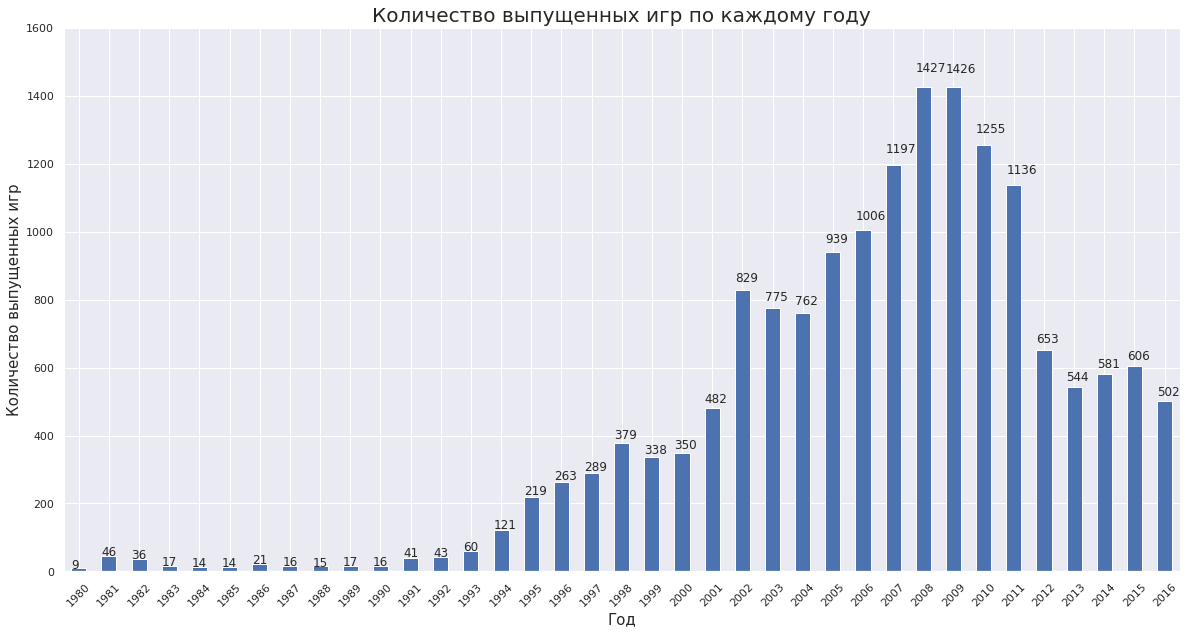

In [26]:
plot_subs(plot_data_count_games, 45, 'Количество выпущенных игр по каждому году', 'Год', \
          'Количество выпущенных игр', ylim=(None, 1600)  )

По графику видим, что 1980-1993 годы выпускалось наименьшее количество игр (эти данные не очень важны, т.к. выборка небольшая и их анализ не даст объективных результатов). Далее индустрия начала интенсивно развиваться вплоть до 2008 и 2009 года, когда количество выпущенных игр достигло своего пика в 1427 игр. И до 2016 года выпуск игр практически с каждым годом становится все меньше. В 2016 году мы видим наименьшее значение после пика в 502 игры, что может быть связано с тем, что у нас данные не за полный год. Возможно рост игр связан с тем, что игровая индустрия поймала "волну" и активно разрабатывала новые и новые игры, затем произошло пресыщение рынка, пользователи стали более требовательными, спрос на игры упал, соответственно предложение тоже - студии начали вкладываться не в количество, а в качество производимых игр.

**Анализ того, как менялись продажи по платформам. Выбор платформ с наибольшими суммарными продажами и построение графика распределения по годам.**

Составим сводную таблицу для выделения топа платформ, по которым в дальнейшем будем анализировать продажи.

In [27]:
platform_pivot = df.pivot_table(index = 'platform',  values = 'total_sales', aggfunc = 'sum')
platform_pivot.describe()

,total_sales
count,31.000000
mean,284.334564
std,343.954132
min,0.030000
25%,22.150000
50%,200.039993
75%,301.205002
max,1233.559937


Если рассмотреть сумму продаж по каждой платформе за все года, можно заметить, что в среднем суммарные продажи составляли около 284 млн проданных копий. Наибольшее значение - 1233 млн проданных копий, наименьшее - 3 000 проданных копий.

In [28]:
platform_pivot.T

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
total_sales,86.480003,0.1,257.809998,15.95,802.780029,254.429993,312.880005,196.729996,28.35,0.04,218.009995,251.050003,1.44,255.759995,0.03,727.580017,1233.559937,931.339966,314.140015,289.529999,53.810001,33.59,1.86,200.039993,0.16,1.42,891.179993,82.190002,961.23999,251.569992,159.320007


In [29]:
mask_75q = float(platform_pivot.quantile(0.75)) #Пороговое значение 75% квантиля

Возьмем значение 75% процентиля для выгрузки платформ с наибольшими продажами.

In [30]:
platform_pivot.query('total_sales >= @mask_75q')

,total_sales
platform,
DS,802.780029
GBA,312.880005
PS,727.580017
PS2,1233.559937
PS3,931.339966
PS4,314.140015
Wii,891.179993
X360,961.239990


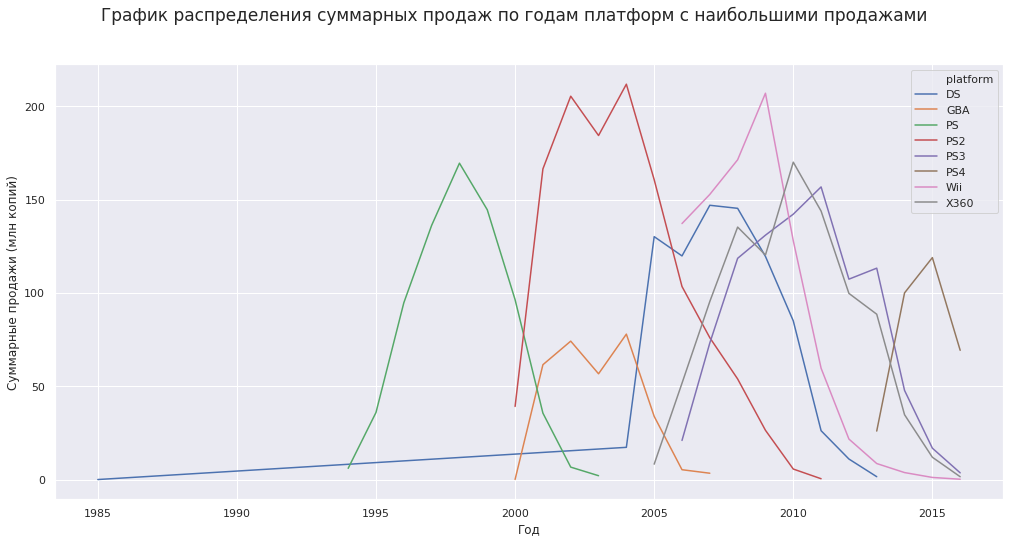

In [31]:
plot_data = df[df['platform'].isin(['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360'])].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(17, 8))
plt.suptitle('График распределения суммарных продаж по годам платформ с наибольшими продажами', size=17)
sns.lineplot(data = plot_data, x='year_of_release', y='total_sales', hue='platform', palette='deep', legend='brief')
plt.xlabel('Год', size=12)
plt.ylabel('Суммарные продажи (млн копий)', size=12)

plt.show()

Долгое время платформа DS была чуть ли не единственным поставщиком игр вплоть до 1994 года. По всем платформам исходя из графика наблюдаем рост суммарных продаж после возникновения платформы, затем достижение определенного пика, после которого наблюдается падение продаж. В среднем новые платформы возникают каждое 5-летие. "Живут" около 10 лет. Наибольшее значение суммарных продаж видим у платформы PS2 в 2004 году - около 210 млн. копий. Недалеко от нее ушла платформа Wii в 2009 году - около 207 млн. копий.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Поскольку нам необходимо определить актуальный период, который поможет нам построить прогноз на 2017 год, возьмем данные за 2015 и 2016 год, чтобы посмотреть как суммарные продажи изменились за год.

In [32]:
df[df['year_of_release'] == 2016].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10772,The Idolmaster: Platinum Stars,PS4,2016,Simulation,0.00,0.00,0.10,0.00,0.0,0.0,0,0.10
11725,Zero Escape: Zero Time Dilemma,3DS,2016,Adventure,0.05,0.00,0.02,0.01,81.0,8.5,M,0.08
6427,Batman: Return to Arkham,PS4,2016,Action,0.07,0.16,0.00,0.04,73.0,8.5,T,0.27
15840,Shin Hayarigami 2,PSV,2016,Adventure,0.00,0.00,0.02,0.00,0.0,0.0,0,0.02
2024,NBA 2K17,XOne,2016,Sports,0.86,0.06,0.00,0.11,90.0,6.2,E,1.03


Построим сводную таблицу по суммарным продажам платформ за 2016 год и выведем таблицей ТОП 5 перспективных платформ (c разбивкой суммарных продаж по регионам).

In [33]:
platform2016_pivot = df[df['year_of_release'] == 2016].pivot_table(index = 'platform', \
                    values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc = 'sum')
platform2016_pivot.sort_values(by = 'total_sales', ascending = False).head(5)

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,31.780001,5.74,21.49,69.25
XOne,9.630000,0.01,14.27,26.15
3DS,2.330000,8.03,4.14,15.14
PC,3.530000,0.00,1.36,5.25
WiiU,1.480000,0.67,2.10,4.60


Из ТОП 5 по суммарным продажам лидирует с большим отрывом платформа PS4 - около 69 млн. экземпляров. При этом наибольшей популярностью она пользуется у европейской части населения. 

Построим также сводную таблицу по данным 2015 года, чтобы увидеть как изменялись суммарные продажи за 2015 - 2016 год.

In [34]:
platform2015_pivot = df[df['year_of_release'] == 2015].pivot_table(index = 'platform', \
                    values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc = 'sum')
platform2015_pivot.sort_values(by = 'total_sales', ascending = False)

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,51.760002,6.31,42.369999,118.900002
XOne,18.469999,0.17,36.029999,60.139999
3DS,5.060000,15.52,6.170000,27.780001
PS3,6.040000,3.67,4.990000,16.820000
WiiU,5.010000,3.45,6.760000,16.350000
X360,3.500000,0.00,7.360000,11.960000
PC,5.570000,0.00,2.360000,8.520000
PSV,0.690000,4.85,0.390000,6.250000
Wii,0.620000,0.00,0.430000,1.140000


У всех платформ из ТОП 5 2016 года по суммарным продажам наблюдается падение продаж по сравнению с 2015 годом. Например, платформа лидер PS4 за 2015 год выпустила почти 119 млн копий, а в 2016 году всего 69 млн. копий. Если выбирать из всех платформ наиболее потенциальные, то отталкиваясь от суммарных продаж за 2016 год, это будет 3 платформы: PS4, XOne и 3DS.

Поскольку ранее мы выяснили, что в среднем платформа "живет" 5 лет, построим график чуть за меньший срок - 4 года по суммарным продажам каждой платформы.

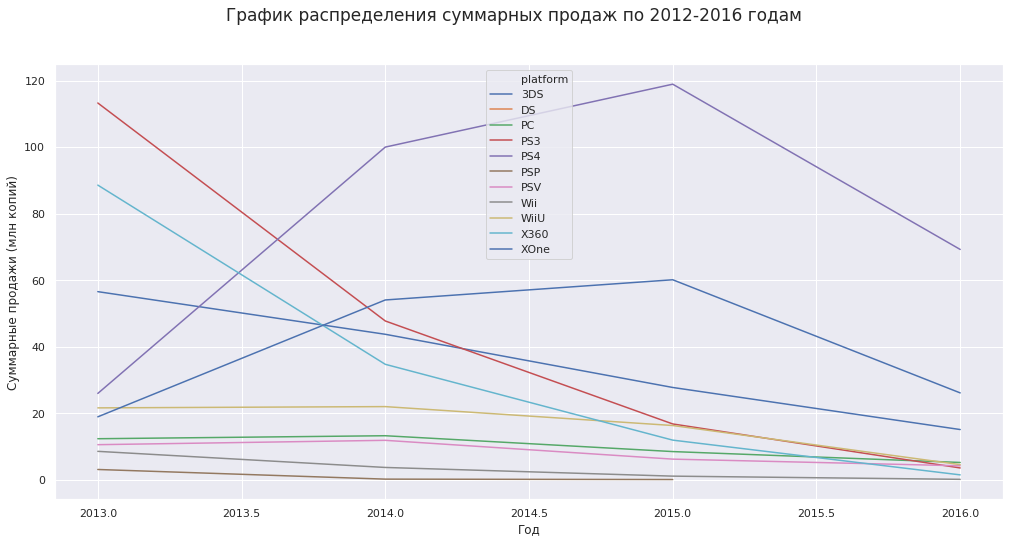

In [35]:
#фильтр для отбора рассматриваемого промежутка времени
filter1 = df['year_of_release'].isin(['2013', '2014', '2015', '2016'])
#Фильтр для отбора топовых платформ
filter2 = df['platform'].isin(['PS4', 'XOne', '3DS', 'PC', 'WiiU'])
plot_data = df[filter1].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(17, 8))
plt.suptitle('График распределения суммарных продаж по 2012-2016 годам', size=17)
sns.lineplot(data = plot_data, x = plot_data['year_of_release'].astype('int'), y='total_sales', hue='platform', palette='deep', legend='brief')
plt.xlabel('Год', size=12)
plt.ylabel('Суммарные продажи (млн копий)', size=12)

plt.show()

***Вопрос к ревьюеру:*** Не поняла как отрегулировать, чтобы годы внизу графика были целочисленными. Прошу совета, как это сделать :)

По построенному графику видим, что, хотя к 2016 году суммарные продажи по всем платформам шли на спад, наиболее перспективными и потенциально прибыльными оказались PS4, XOne и 3DS с большим отрывом от других платформ. Продажи платформы PSP сошли на нет в 2015 году

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

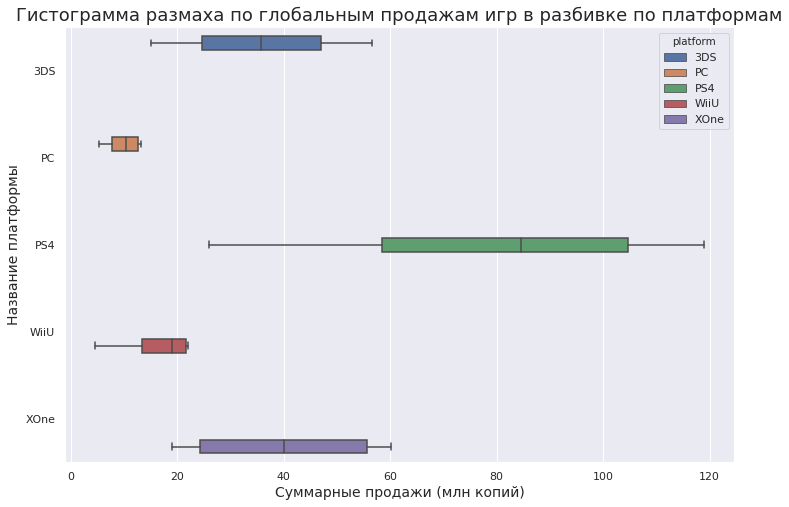

In [36]:
plt.figure(figsize=(12, 8))
plot_data2 = df[filter1 & filter2].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ax = sns.boxplot(x='total_sales', y='platform', data=plot_data2, hue='platform')
plt.title('Гистограмма размаха по глобальным продажам игр в разбивке по платформам', size=18)
plt.xlabel('Суммарные продажи (млн копий)', size=14)
plt.ylabel('Название платформы', size=14)

plt.show()


После построения "ящика с усами" мы видим, что суммарные продажи платформы PS4 в среднем выше, чем у остальных у платформ и находятся в диапазоне 25 - 118 млн. копий. Разброс продаж у этой платформы за рассматриваемый период (2013-2016 год)  намного шире остальных платформ. Суммарные продажи платформы XOne находятся в диапазоне 18-60 млн. копий. Медианное значение - 40 млн. копий. Суммарные продажи платформы 3DS за 2013-2016 гг. составляют от 15 до 56 млн.копий, при этом медианное значение - 35 млн. Значения суммарных продаж платформы WiiU находятся в диапазоне от 5 до 22 млн. копий , а медианное значение - 19 млн. копий. Платформа PC оказалась самой "слабой" среди топовых платформ главным образом потому, что популярность в 2013-2016 году данной платформы все больше угасала. Ее суммарные продажи находились в диапазоне от 5 до 16 млн. копий.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

 Построим диаграмму рассеяния платформы PS4, отражающую влияние отзывов пользователей и критиков на продажи. Синими точками обозначим оценки критиков, а красными треугольниками - пользователей. При построении диаграммы рассеяния для оценок пользователей использовалось масштабирование, т.к. там используется другая шкала. Также мы ограничили ось y до 10. Поскольку в начале нашего исследования мы обозначили как 0 пустые значения, а также нулем обозначили оценку 'tbd', эти значения выпадают из исследования и их мы не станем учитывать.

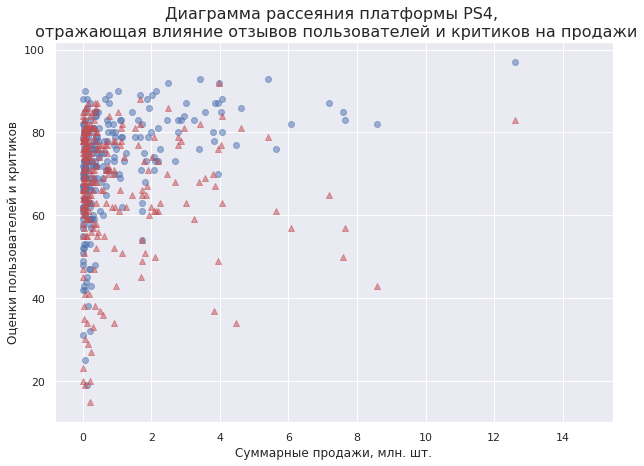

In [37]:
filter4 = df['platform'].isin(['PS4']) #Фильтр для выбора платформы PS4
plot_data3 = df[filter1 & filter4]
plt.figure(figsize=(10, 7))
plt.scatter(x=plot_data3['total_sales'], y=plot_data3['critic_score'], alpha=0.5)
plt.scatter(x=plot_data3['total_sales'], y=plot_data3['user_score']*10,  c='r', alpha=0.5, marker='^')
plt.title('Диаграмма рассеяния платформы PS4, \n отражающая влияние отзывов пользователей и критиков на продажи' , \
          size=16)
plt.xlabel('Суммарные продажи, млн. шт.')
plt.ylabel('Оценки пользователей и критиков')
plt.ylim(10, None)
plt.show()


Из диаграммы видим, что для платформы PS4 существуют нишевые игры, которые не продаются многомиллионными тиражами, но при этом пользуются популярностью у пользователей и получают высокие оценки критиков. При этом, конечно есть игры с небольшим тиражом, которые имеют низкие оценки и критиков, и пользователей. По большей части оценки критиков выше, чем оценки пользоватей. На графике видим одну игру, суммарные продажи по которой составили почти 12,5 млн. Далее посмотрим все игры на платформе PS4, которые продавались больше чем 6 млн. экземпляров.

In [38]:
plot_data3[plot_data3['total_sales'] > 6 ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,0,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.660000
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.600000
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.170000
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.080000


Из таблицы видим 2 игры с наибольшими суммарными продажами: Call of Duty: Black Ops 3(14,6 млн.шт.) и Grand Theft Auto V (12,6 млн.шт). Игра Call of Duty: Black Ops 3 выпала из нашего диапазона рассмотрения, т.к. по ней не оказалось данных об оценках пользователей и критиков. Наблюдается тенденция, что футбольные симуляторы очень популярны на приставках: FIFA 15, FIFA 16 и FIFA 17 вошли в топ по продажам на платформе PS4.

Посчитаем корреляцию между отзывами и продажами на платформе PS4.

In [39]:
print('Коэффициент корреляции Пирсона между отзывами критиков и суммарными продажами: {:.2f}'.\
      format(plot_data3['total_sales'].corr(plot_data3['critic_score'])))
print('Коэффициент корреляции Пирсона между отзывами пользователей и суммарными продажами: {:.2f}'.\
      format(plot_data3['total_sales'].corr(plot_data3['user_score'])))

Коэффициент корреляции Пирсона между отзывами критиков и суммарными продажами: 0.23
Коэффициент корреляции Пирсона между отзывами пользователей и суммарными продажами: 0.11


После подсчета коэффициента корреляции между отзывами и суммарными продажами видим, несмотря на то, что коэффициент корреляции между отзывами критиков и суммарными продажами (0,23) выше, чем коэффициент корреляции Пирсона между отзывами пользователей и суммарными продажами (0,11), что означает - оценки критиков формируют рынок, но всё же влияние оценок на продажи не очень высокое. Наблюдаем положительную зависимость - чем выше оценки, тем выше суммарные продажи, но так происходит не всегда. Иногда достаточно нишевые игры, с невысокими продажами (ниже 1 млн.экземпляров) вызывают бурный восторг у пользователей. 

**Соотнесите выводы с продажами игр на других платформах.**

Построим гистограммы рассеяния для всех платформ, у которых были не нулевые значения оценок пользователей и критиков.

In [40]:
non_zero_df = df[(df['critic_score'] != 0) & (df['user_score'] != 0)]

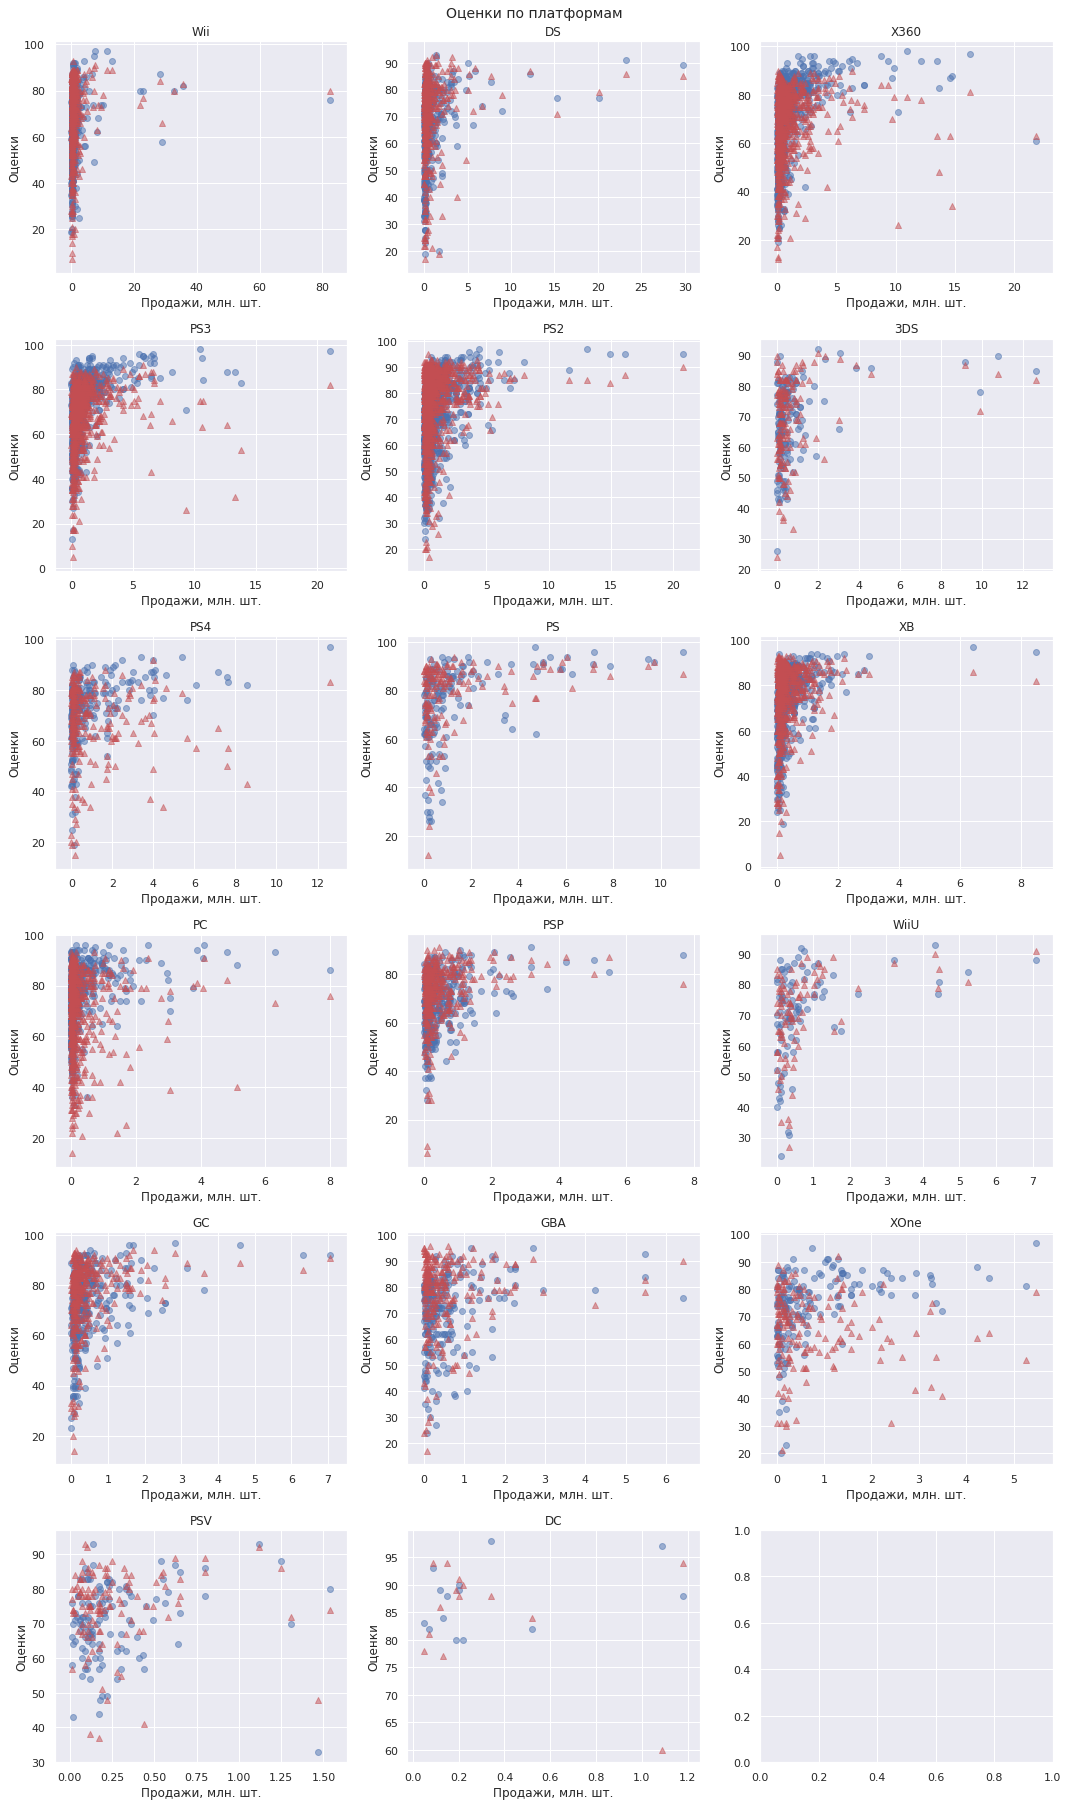

In [41]:
WIDTH = 3
plot_amount = len(non_zero_df['platform'].unique())
height = plot_amount//WIDTH + 1


fig, axs = plt.subplots(height, WIDTH, figsize=(15, 25))
fig.suptitle('Оценки по платформам',  y=1.003, size=14)

for platform, ax in zip(non_zero_df['platform'].unique(), np.ravel(axs)):
    plot_data3 = non_zero_df[non_zero_df['platform'] == platform]
    ax.scatter(x=plot_data3['total_sales'], y=plot_data3['critic_score'], alpha=0.5)
    ax.scatter(x=plot_data3['total_sales'], y=plot_data3['user_score']*10,  c='r', alpha=0.5, marker='^')
    ax.set_title(platform , size=12)
    ax.set_xlabel('Продажи, млн. шт.')
    ax.set_ylabel('Оценки')

plt.tight_layout()
plt.show()

Почти на всех платформах мы видим наличие нишевых игр, продажи по которым ниже, чем по остальным играм, но которые при этом имеют достаточно высокие оценки пользователей и критиков (70-90). При этом у каждой платформы есть игры, которые "выстреливают", активно продаваясь на рынке. Что интересно, по таким играм (в силу их немногочисленности) мы можем увидеть, когда пользователи оценили игру выше критиков и наоборот. Например, у платформ Wii, X360, PS, PS2, PS3, PS4, XOne, PC оценки критиков по играм почти всегда выше оценок пользователей, у платформ же PSP, WiiU, GBA и PSV все наоборот - критики их меньше жалуют, чем пользователи. 

Интересно, что по платформе Wii мы на графике видим игру, у которой были продажи чуть больше 80 млн экземпляров (такого значения не наблюдается ни на одном из построенных диаграмм). Посмотрим, что это была за игра.

In [42]:
df[df['total_sales'] > 80]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993


Видим, что это Wii Sports. Скорее всего это предустановленная игра, которая переходила к пользователю вместе с приставкой, что означает наши продажи игры на графике в данном случае по факту показывают продажи самой приставки.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [43]:
plot_data_genre_count = df[filter1].groupby(df['genre'])['name'].count()

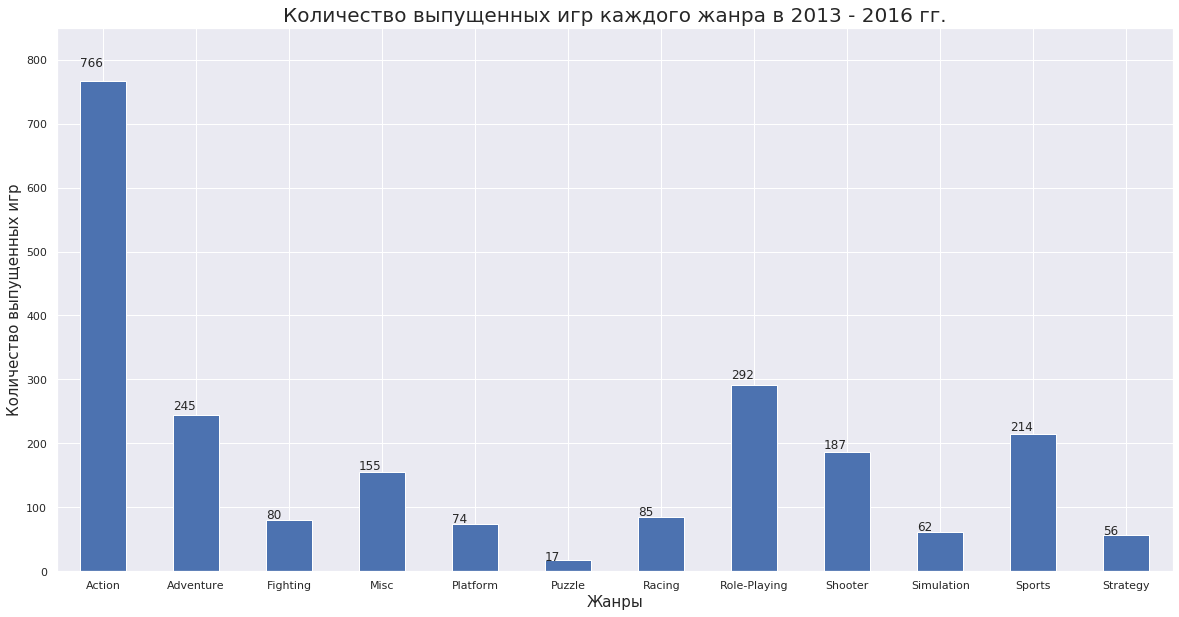

In [44]:
plot_subs(plot_data_genre_count, 0, 'Количество выпущенных игр каждого жанра в 2013 - 2016 гг.', 'Жанры', \
          'Количество выпущенных игр', ylim = (None, 850))

По построенному графику видим, что абсолютным лидером по количеству выпущенных игр в 2013-2016 гг. был жанр Action. Всего было выпущено 766 игр данного жанра. Жанры Role-Playing (292 игры), Adventure (245) и Sports (214) также лидируют по количеству выпущенных игр. Самым отстающим жанром оказался Puzzle, за 4 года было выпущено всего 17 игр.

Построим графики распределения общих продаж по жанрам.

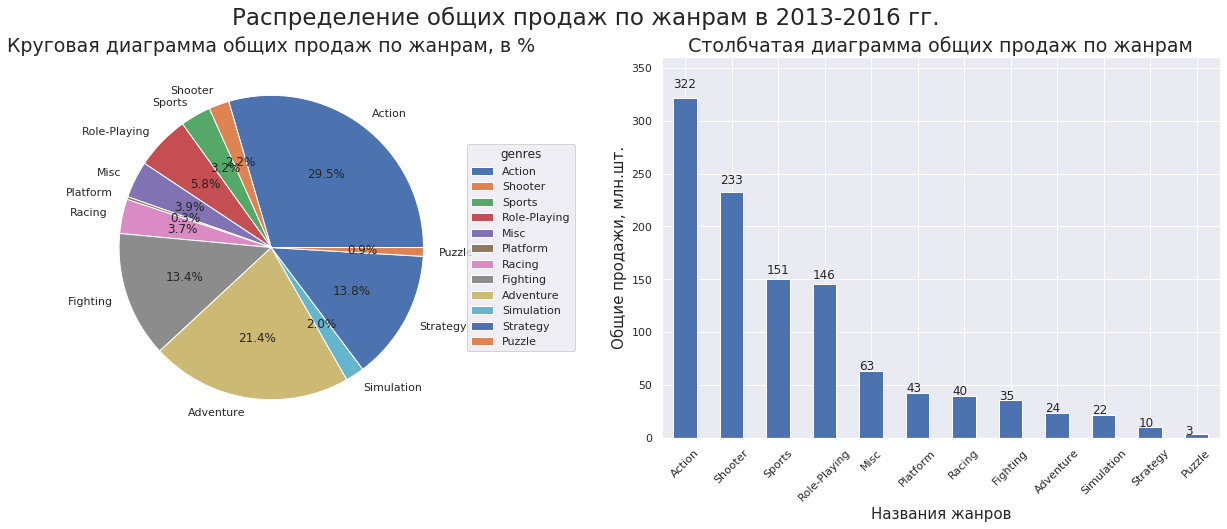

In [45]:
plot_data4 = df[filter1].groupby(df['genre'])['total_sales'].sum().sort_values(ascending=False) #Данные для построения графиков

fig, axs = plt.subplots(1, 2, figsize=(22,7))
plt.suptitle('Распределение общих продаж по жанрам в 2013-2016 гг.', size=23)

#Построение круговой диаграммы
axs[0].set_title('Круговая диаграмма общих продаж по жанрам, в %', size = 19)
axs[0].pie(df[filter1].groupby(df['genre'])['total_sales'].sum(), autopct = '%1.1f%%', labels = plot_data4.index.to_list())
axs[0].legend(title = 'genres',
          loc = 'center left',
             bbox_to_anchor=(1, 0, 0.5, 1))

#Построение столбчатой диаграммы
axs[1].set_title('Столбчатая диаграмма общих продаж по жанрам', size = 19)
ax = plot_data4.plot(kind='bar', rot=45)
for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))
axs[1].set_xlabel('Названия жанров', size=15)
axs[1].set_ylabel('Общие продажи, млн.шт.', size=15)
axs[1].set_ylim(None, 360)    

plt.show()

Из построенных графиков видим, что игры жанра Action за рассматриваемый промежуток времени принесли больше всего суммарных продаж - 322 млн. экземпляров или 29,5% от всех продаж. Жанр Shooter также пользовался популярностью среди пользователей (21.4% от общих продаж или 233 млн экземпляров). Третье место по продажам разделили между собой жанры Role-Playing (13.4%)  и Sports(13.8%) или 146 и 151 млн. экземпляров соответственно. Самый непопулярный жанр среди пользователей - Puzzle (0,3%) - было продано 3 млн.экземпляров.

### Вывод

Исходя из анализа данного блока можем сделать следующие выводы:

- В 1980-1993 годы выпускалось наименьшее количество игр. Далее индустрия начала интенсивно развиваться вплоть до 2008 и 2009 года, когда количество выпущенных игр достигло своего пика в 1427 игр. И до 2016 года выпуск игр практически с каждым годом становится все меньше. Возможно рост игр связан с тем, что игровая индустрия поймала "волну" и активно разрабатывала новые и новые игры, затем произошло пресыщение рынка, пользователи стали более требовательными, спрос на игры упал, соответственно предложение тоже - студии начали вкладываться не в количество, а в качество производимых игр.  В 2016 году было наименьшее количество выпущенных игр после пика в 502 игры, что может быть связано с тем, что у нас данные не за полный год. 

- Долгое время платформа DS была чуть ли не единственным поставщиком игр вплоть до 1994 года. По всем платформам исходя из графика наблюдаем рост суммарных продаж после возникновения платформы, затем достижение определенного пика, после которого наблюдается падение продаж. В среднем новые платформы возникают каждое 5-летие. "Живут" около 10 лет. Наибольшее значение суммарных продаж видим у платформы PS2 в 2004 году - около 210 млн. копий. Недалеко от нее ушла платформа Wii в 2009 году - около 207 млн. копий.

- Из ТОП 5 по суммарным продажам лидирует с большим отрывом платформа PS4 - около 69 млн. экземпляров. При этом наибольшей популярностью она пользуется у европейской части населения. 

- У всех платформ из ТОП 5 2016 года по суммарным продажам наблюдается падение продаж по сравнению с 2015 годом. Например, платформа лидер PS4 за 2015 год выпустила почти 119 млн копий, а в 2016 году всего 69 млн. копий. Если выбирать из всех платформ наиболее потенциальные, то отталкиваясь от суммарных продаж за 2016 год, это будет 3 платформы: PS4, XOne и 3DS.

- Хотя к 2016 году суммарные продажи по всем платформам шли на спад, наиболее перспективными и потенциально прибыльными оказались PS4, XOne и 3DS с большим отрывом от других платформ. Продажи платформы PSP сошли на нет в 2015 году

- Суммарные продажи платформы PS4 в среднем выше, чем у остальных у платформ и находятся в диапазоне 25 - 118 млн. копий. Разброс продаж у этой платформы за рассматриваемый период (2013-2016 год) намного шире остальных платформ. Суммарные продажи платформы XOne находятся в диапазоне 18-60 млн. копий. Медианное значение - 40 млн. копий. Суммарные продажи платформы 3DS за 2013-2016 гг. составляют от 15 до 56 млн.копий, при этом медианное значение - 35 млн. Значения суммарных продаж платформы WiiU находятся в диапазоне от 5 до 22 млн. копий , а медианное значение - 19 млн. копий. Платформа PC оказалась самой "слабой" среди топовых платформ главным образом потому, что популярность в 2013-2016 году данной платформы все больше угасала. Ее суммарные продажи находились в диапазоне от 5 до 16 млн. копий.

- Для платформы PS4 существуют нишевые игры, которые не продаются многомиллионными тиражами, но при этом пользуются популярностью у пользователей и получают высокие оценки критиков. При этом, конечно есть игры с небольшим тиражом, которые имеют низкие оценки и критиков, и пользователей. По большей части оценки критиков выше, чем оценки пользоватей. 

- Наблюдается тенденция, что футбольные симуляторы очень популярны на приставках: FIFA 15, FIFA 16 и FIFA 17 вошли в топ по продажам на платформе PS4.

- После подсчета коэффициента корреляции между отзывами и суммарными продажами видим, несмотря на то, что коэффициент корреляции между отзывами критиков и суммарными продажами (0,23) выше, чем коэффициент корреляции Пирсона между отзывами пользователей и суммарными продажами (0,11), что означает - оценки критиков формируют рынок, но всё же влияние оценок на продажи не очень высокое. Наблюдаем положительную зависимость - чем выше оценки, тем выше суммарные продажи, но так происходит не всегда. Иногда достаточно нишевые игры, с невысокими продажами (ниже 1 млн.экземпляров) вызывают бурный восторг у пользователей. 

- Почти на всех платформах мы видим наличие нишевых игр, продажи по которым ниже, чем по остальным играм, но которые при этом имеют достаточно высокие оценки пользователей и критиков (70-90). При этом у каждой платформы есть игры, которые "выстреливают", активно продаваясь на рынке. Что интересно, по таким играм (в силу их немногочисленности) мы можем увидеть, когда пользователи оценили игру выше критиков и наоборот. Например, у платформ Wii, X360, PS, PS2, PS3, PS4, XOne, PC оценки критиков по играм почти всегда выше оценок пользователей, у платформ же PSP, WiiU, GBA и PSV все наоборот - критики их меньше жалуют, чем пользователи. 

- Абсолютным лидером по количеству выпущенных игр в 2013-2016 гг. был жанр Action. Всего было выпущено 766 игр данного жанра. Жанры Role-Playing (292 игры), Adventure (245) и Sports (214) также лидируют по количеству выпущенных игр. Самым отстающим жанром оказался Puzzle, за 4 года было выпущено всего 17 игр.

-  Игры жанра Action за рассматриваемый промежуток времени принесли больше всего суммарных продаж - 322 млн. экземпляров или 29,5% от всех продаж. Жанр Shooter также пользовался популярностью среди пользователей (21.4% от общих продаж или 233 млн экземпляров). Третье место по продажам разделили между собой жанры Role-Playing (13.4%) и Sports(13.8%) или 146 и 151 млн. экземпляров соответственно. Самый непопулярный жанр среди пользователей - Puzzle (0,3%) - было продано 3 млн.экземпляров.

## Шаг 4. Составьте портрет пользователя каждого региона <a class="anchor" id="step4"></a>

### Самые популярные платформы (топ-5).  Опишите различия в долях продаж.

Подготовим данные для реализации графиков.

In [46]:
plot_data_na_platform = df[filter1].groupby(df[filter1]['platform'])['na_sales'].sum().sort_values(ascending=False)
plot_data_eu_platform = df[filter1].groupby(df[filter1]['platform'])['eu_sales'].sum().sort_values(ascending=False)
plot_data_jp_platform = df[filter1].groupby(df[filter1]['platform'])['jp_sales'].sum().sort_values(ascending=False)

Напишем функцию для построения графиков.

In [47]:
def subplots_pie_plot(data, suptitle, title0, title1, xlabel, ylabel, ylim, legendname):
    ''''
    input:
        data - данные, которые используются
        suptitle - название графика
        title0, title1 - название круговой и столбчатой диаграммы
        xlabel - название оси x столбчатой диаграммы
        ylabel - название оси y столбчатой диаграммы 
        ylim - ограничения по оси y второго графика
        legendname - описание для круговой диаграммы
    '''
    fig, axs = plt.subplots(1, 2, figsize=(22,7))
    plt.suptitle(suptitle, size=23)

#Построение круговой диаграммы
    axs[0].set_title(title0, size = 19)
    axs[0].pie(data.head(5), autopct = '%1.1f%%', labels = data.index.to_list()[0:5])
    axs[0].legend(title = legendname,
          loc = 'center left',
             bbox_to_anchor=(1, 0, 0.5, 1))

#Построение столбчатой диаграммы
    axs[1].set_title(title1, size = 19)
    ax = data.plot(kind='bar', rot=45)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))
    axs[1].set_xlabel(xlabel, size=15)
    axs[1].set_ylabel(ylabel, size=15)

    if ylim is not None:
        axs[1].set_ylim(ylim)
   

    plt.show()

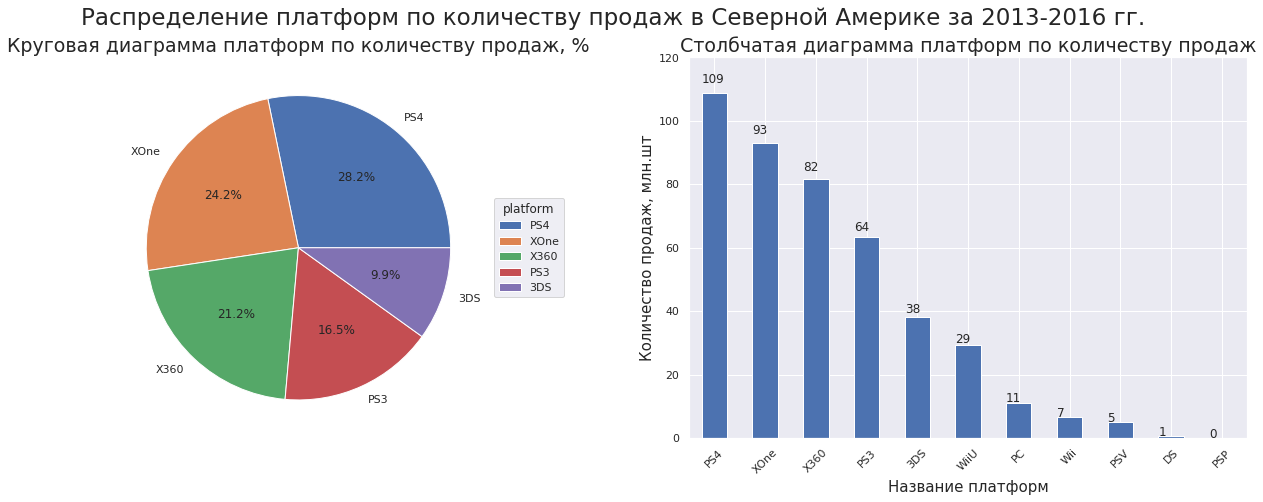

In [48]:
subplots_pie_plot(plot_data_na_platform, 'Распределение платформ по количеству продаж в Северной Америке за 2013-2016 гг.', \
                  'Круговая диаграмма платформ по количеству продаж, %', 'Столбчатая диаграмма платформ по количеству продаж',\
                  'Название платформ', 'Количество продаж, млн.шт', (None, 120), 'platform')

По графику видим, что в Северной Америке платформами-лидерами по количеству продаж за 2013-2016 гг. являлись:
1. PS4 (109 млн. копий игр)
2. XOne (93 млн. копий игр)
3. X360 (82 млн. копий игр)
4. PS3 (64 млн. копий игр)
5. 3DS (38 млн. копий игр)

По круговой диаграмме видим, что PS4 составляет 28.2 % от всех продаж из топа-5 в Северной Америке, XOne 24.2%, а X360 - 21.2%

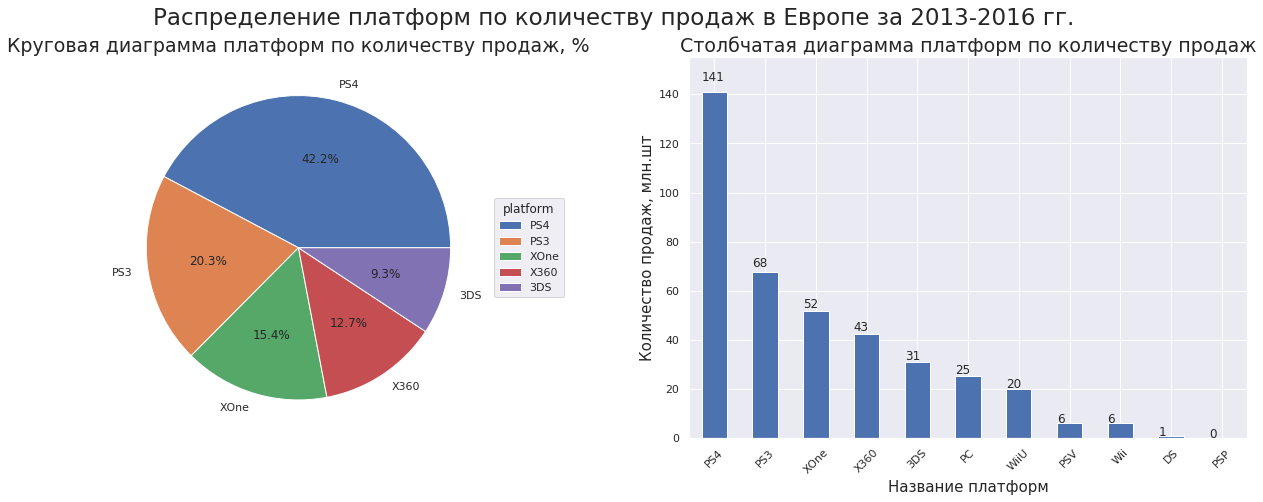

In [49]:
subplots_pie_plot(plot_data_eu_platform, 'Распределение платформ по количеству продаж в Европе за 2013-2016 гг.', \
                  'Круговая диаграмма платформ по количеству продаж, %', 'Столбчатая диаграмма платформ по количеству продаж',\
                  'Название платформ', 'Количество продаж, млн.шт', (None, 155), 'platform')

В ТОП-5 платформ по количеству продаж за 2013-2016 гг. в Европе входят:
1. PS4 (141 млн. копий игр)
2. PS3 (68 млн. копий игр)
3. XOne (52 млн. копий игр)
4. X360 (43 млн. копий игр)
5. 3DS (31 млн. копий игр)

Продажи в Европе по платформе PS4 составляют 42,2% от всех продаж лидеров рынка игр. PS3 составляет 20.3%, а Xone -15.4% от всех продаж топа-5 платформ по Европе. 

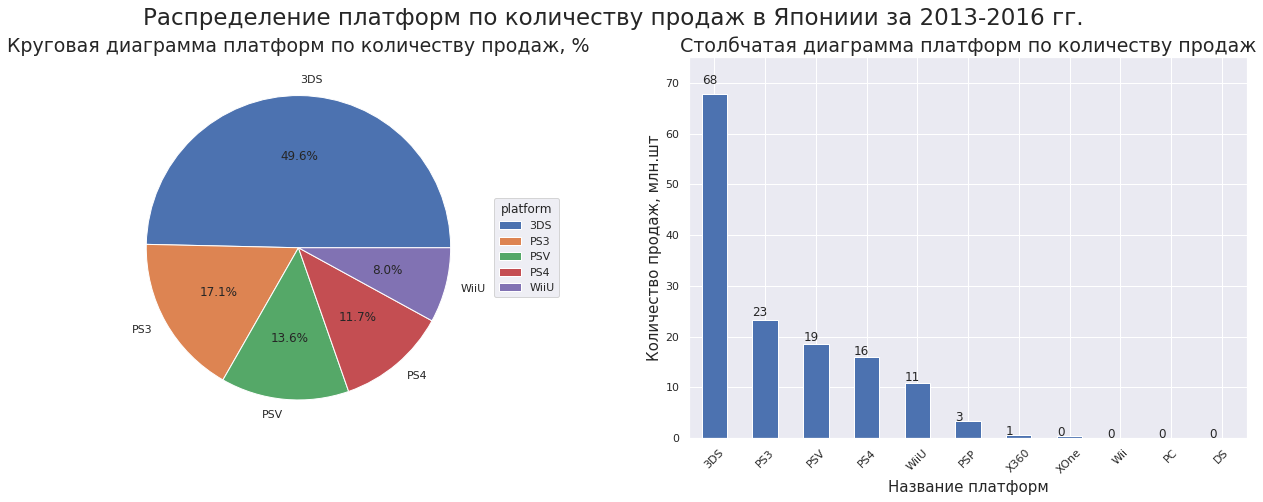

In [50]:
subplots_pie_plot(plot_data_jp_platform, 'Распределение платформ по количеству продаж в Япониии за 2013-2016 гг.', \
                  'Круговая диаграмма платформ по количеству продаж, %', 'Столбчатая диаграмма платформ по количеству продаж',\
                  'Название платформ', 'Количество продаж, млн.шт', (None, 75), 'platform')

Лидирующими платформами по количеству продаж за 2013-2016 гг. в Японии являлись:
1. 3DS (68 млн. копий игр)
2. PS3 (23 млн. копий игр)
3. PSV (19 млн. копий игр)
4. PS4 (16 млн. копий игр)
5. WiiU (11 млн. копий игр)

Как видим по круговой диаграмме, безусловным лидером среди платформ в Японии становится 3DS и составляет 46.6% от общего числа продаж среди топовых платформ. PS3 (17.1%) и PSV (13.6%) занимают второе и третье место соответственно.

Из полученных графиков можно сделать вывод, что предпочтения пользователей и в Северной Америке, и в Европе схожи - и там, и там лидирует платформа PS4 по региональным продажам. Список лидеров одинаков, за исключением того, что количество продаж варьируется, в связи с чем меняется рейтинг по предпочтениям. 
Рынок Японии же кардинально отличается. Тут мы видим появление среди ТОПа-5 таких платформ как PSV и WiiU. При этом плтформа 3DS является лидером с большим отрывом среди остальных платформ.
Сходства Европейского и Американского рынка игр могут быть связаны с национальными особенностями - у людей из этих регионов сформировался определенный образ идеальных игр, определенные паттерны для поведения в игре, которые влияют на спрос игр новых платформ и желание поэксперементировать. Японцы же более консервативны в данном вопросе и предпочитают платформу 3DS, которая стала по-настоящему национальной консолью. Непопулярность платформы PS4 в Японии может быть связана с дорогой ценой или другими особенностями.

### Самые популярные жанры (топ-5). Поясните разницу.

Подготовим данные для построения графиков.

In [51]:
plot_data_na_genre = df[filter1].groupby(df[filter1]['genre'])['na_sales'].sum().sort_values(ascending=False)
plot_data_eu_genre = df[filter1].groupby(df[filter1]['genre'])['eu_sales'].sum().sort_values(ascending=False)
plot_data_jp_genre = df[filter1].groupby(df[filter1]['genre'])['jp_sales'].sum().sort_values(ascending=False)

Построим графики самых популярных жанров.

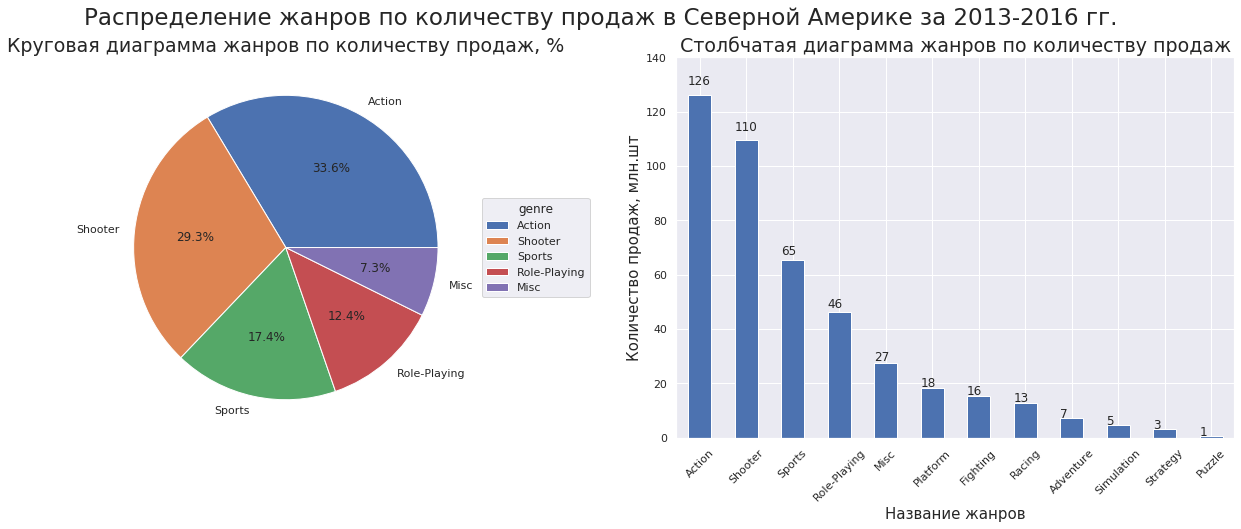

In [52]:
subplots_pie_plot(plot_data_na_genre, 'Распределение жанров по количеству продаж в Северной Америке за 2013-2016 гг.', \
                  'Круговая диаграмма жанров по количеству продаж, %', 'Столбчатая диаграмма жанров по количеству продаж',\
                  'Название жанров', 'Количество продаж, млн.шт', (None, 140), 'genre')

В ТОП-5 жанров по количеству продаж в Северной Америке за 2013-2016 годы входят:
1. Action (126 млн. проданных экземпляров)
2. Shooter (110 млн. проданных экземпляров)
3. Sports (65 млн. проданных экземпляров)
4. Role-Playing (46 млн. проданных экземпляров)
5. Misc (27 млн. проданных экземпляров)

Исходя из круговой диаграммы мы видим, что 33,6% от всех продаж ТОПа-5 в Северной Америке составляют игры жанра Action. Игры жанров Shooter и Sports также пользуются достаточно большой популярностью и составляют 29.3% и 17.4% соответственно от всех продаж лидеров рынка по Северной Америке.

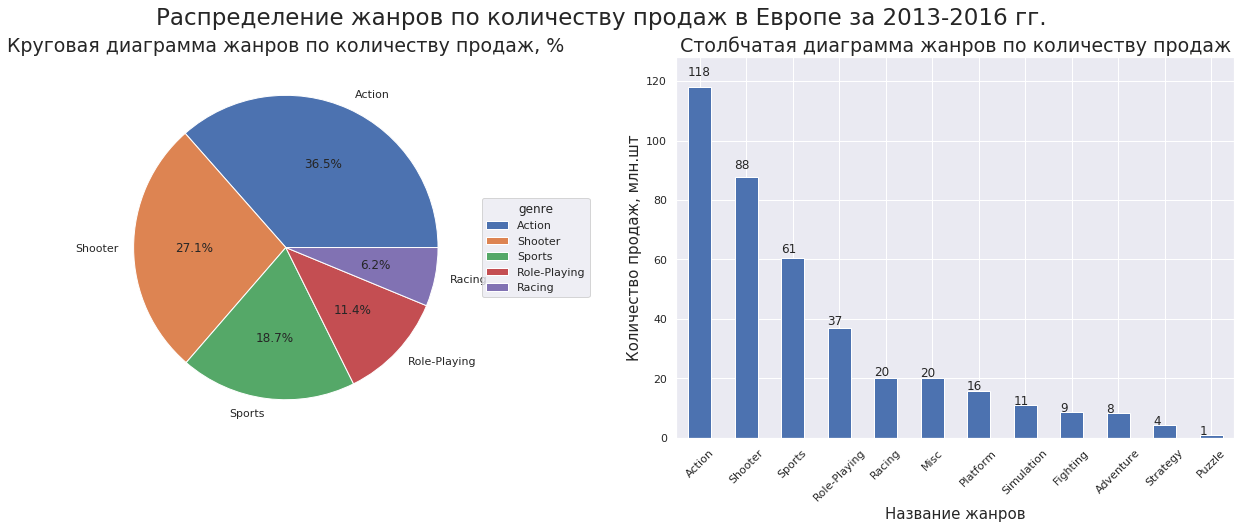

In [53]:
subplots_pie_plot(plot_data_eu_genre, 'Распределение жанров по количеству продаж в Европе за 2013-2016 гг.', \
                  'Круговая диаграмма жанров по количеству продаж, %', 'Столбчатая диаграмма жанров по количеству продаж',\
                  'Название жанров', 'Количество продаж, млн.шт', (None, 128), 'genre')

Жанры, которые являются лидерами в Европе за 2013-2016 годы:
1. Action (118 млн. проданных экземпляров)
2. Shooter (88 млн. проданных экземпляров)
3. Sports (61 млн. проданных экземпляров)
4. Role-Playing (37 млн. проданных экземпляров)
5. Misc (20 млн. проданных экземпляров)

По круговой диаграмме можно сказать, что больше всего игр по Европе было продано из жанра Action - 36.5% от общих продаж из топа-5 по Европе. На втором и третьем месте жанры Shooter и Sports с долей 27,5% и 18,7% соответственно. 

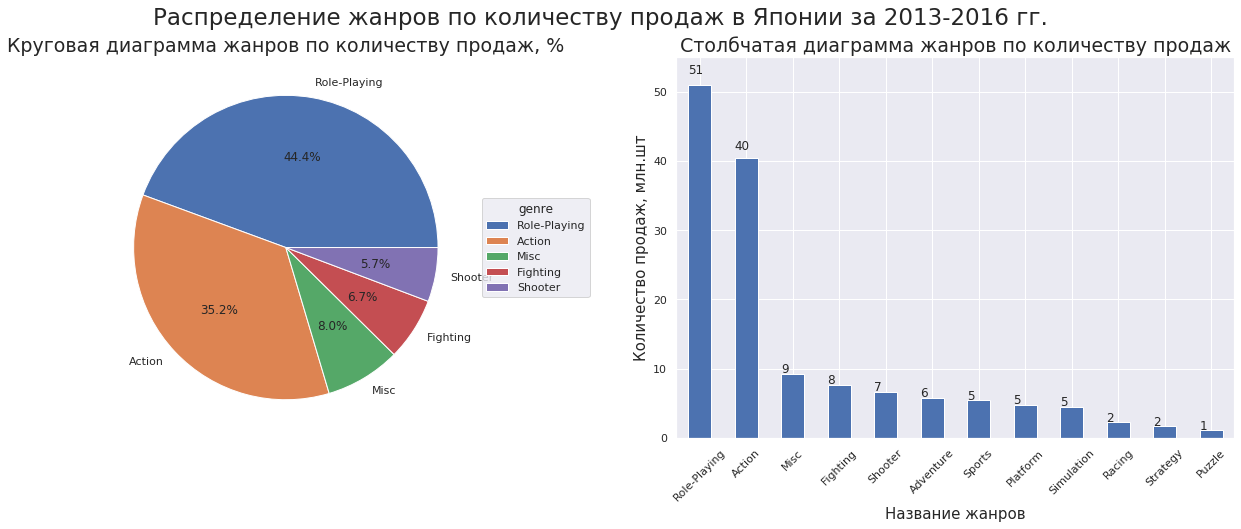

In [54]:
subplots_pie_plot(plot_data_jp_genre, 'Распределение жанров по количеству продаж в Японии за 2013-2016 гг.', \
                  'Круговая диаграмма жанров по количеству продаж, %', 'Столбчатая диаграмма жанров по количеству продаж',\
                  'Название жанров', 'Количество продаж, млн.шт', (None, 55), 'genre')

Жанрами-лидерами по количеству продаж в Японии за 2013-2016 годы являлись:
1. Role-Playing (51 млн. проданных экземпляров)
2. Action  (40 млн. проданных экземпляров)
3. Misc (9 млн. проданных экземпляров)
4. Fighting (8 млн. проданных экземпляров)
5. Shooter (7 млн. проданных экземпляров)

С большим отрывом в Японии по популярности лидируют жанры Role-Playing и Action, которые составляют 44,4% и 35,2% от всех продаж топовых жанров по Японии. 

Исходя из анализа графиков видим, что в целом популярные жанры в Северной Америке и Европе схожи по распределению предпочтений и самым популярным жанром является Action. 
Рынок игр Японии кардианльно отличается от рынка Северной Америки и Европы. Поьзователи отдают предпочтение играм жанра Role-Playing, а также выбирают жанр игр, который не попал в ТОП-5 Европы и Америки  - Fighting.

Сходства Европейского и Американского рынка игр по жанрам могут быть связаны с тем, что в целом предпочтения пользователей игр совпадают, сформирован определенный спрос на рынке и сообщество пользователей - фанатов приставок жанра Action и Shooter. В Японии же распространена идея перевоплощений, косплеев на любимых персонажей, поэтому так распространен жанр Role-Playing.


### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Подготовим данные для построения графиков по рейтингам ESRB чтобы оценить их влияние на продажи по различным регионам: сгруппируем данные по рейтингу, годам и платформам.

In [55]:
plot_data_rating_na = df[filter1].groupby(['rating', 'year_of_release', 'platform'])['na_sales'].sum().reset_index()
plot_data_rating_eu = df[filter1].groupby(['rating', 'year_of_release', 'platform'])['eu_sales'].sum().reset_index()
plot_data_rating_jp = df[filter1].groupby(['rating', 'year_of_release', 'platform'])['jp_sales'].sum().reset_index()

Напишем функцию для построения диаграмм размаха по рейтингам.

In [56]:
def boxplot_rating(data, xname, yname, hue, title, xlabel, ylabel, xlim):
    ''''
    input:
        data - данные, по которым строится боксплот
        xname, yname - значения x и y
        title - название графика
        xlabel, ylabel - названия осей x и y
    '''
    plt.figure(figsize=(10, 5))
    ax = sns.boxplot(x=xname, y=yname, data=data, hue=hue)
    plt.title(title, size=18)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    
    if xlim is not None:
        plt.xlim(xlim)

    plt.show()

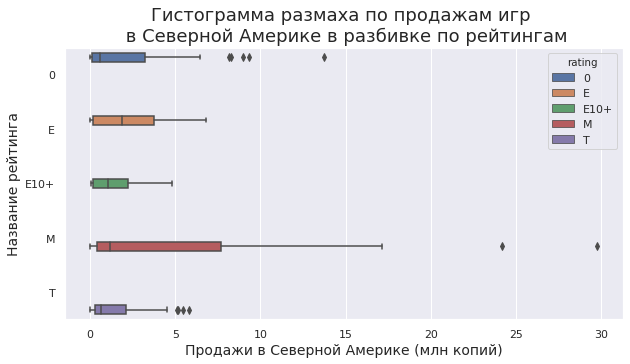

In [57]:
boxplot_rating(plot_data_rating_na, 'na_sales', 'rating', 'rating', \
               'Гистограмма размаха по продажам игр \n в Северной Америке в разбивке по рейтингам', \
               'Продажи в Северной Америке (млн копий)', 'Название рейтинга', None)

По гистограмме размаха видим, что количество продаж по Северной Америке игр с возрастным рейтингом 'M' имеет набольший разброс значений от 0 до 17.5 млн. проданных экземпляров на всех существующих платформах за 2013-2016 гг. При этом у нас имеются также аномальные значения по данному рейтингу. Медианное значение продаж игр в Северной Америке по возрастным рейтингам E10+ и M практически одинаковое - около 1 млн.экземпляров. В выборке суммарных продаж игр по платформам с рейтингом T мы тоже видим наличие аномальных значений. Поскольку рейтинг 0 мы присвоили позициям с отсутствующими значениями, исходя из графика видим, что в целом разброс значений по продажам у игр без рейтинга схож с разбросом значений рейтинга E. А поведение игр с рейтингом E10+(игры для возраста 10+) схоже с поведением рейтинга T(игры для тинейджеров), что логично. Можно отметить, что в принципе влияние наличия возрастного рейтинга на продажи не очень сильное среди всех игр кроме игр с рейтингом M. Такой рейтинг повышает привлекательность игры среди пользователей.

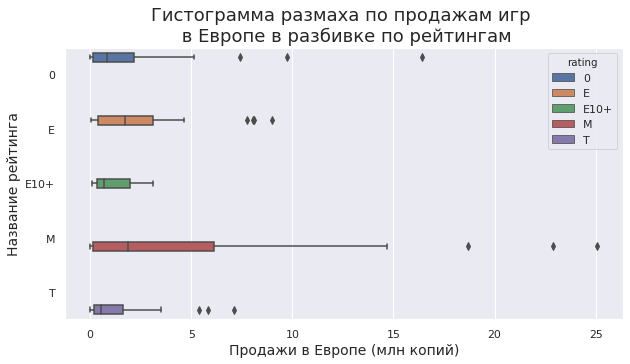

In [58]:
boxplot_rating(plot_data_rating_eu, 'eu_sales', 'rating', 'rating', \
               'Гистограмма размаха по продажам игр \n в Европе в разбивке по рейтингам', \
               'Продажи в Европе (млн копий)', 'Название рейтинга', None)

Ситуация в Европе схожа с ситуацией в Северной Америке. Разброс значений продаж игр по всем возрастным рейтингам кроме рейтинга M находится в диапазоне от 0 до 5 млн. проданных копий. На всех "ящиках с усами" помимо рейтинга E10+ есть аномальные значения. При этом медианное значение продаж игр на платформах с рейтингом Е и M в Европе одинаковое - около 2 млн проданных копий, как и продаж игр с рейтингом E10+ и T - около 1 млн. копий. Самый большой разброс значений продаж по платформам наблюдается у игр с рейтингом M. Так что, наличие этого рейтинга оказывает более сильное влияние на продажи, чем наличие других рейтингов или отсутствия рейтинга вовсе.

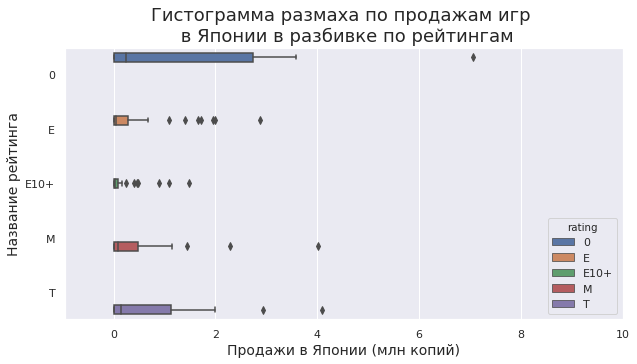

In [59]:
boxplot_rating(plot_data_rating_jp, 'jp_sales', 'rating', 'rating', \
               'Гистограмма размаха по продажам игр \n в Японии в разбивке по рейтингам', \
               'Продажи в Японии (млн копий)', 'Название рейтинга', xlim=(None, 10))

В Японии сложилась самая интересная ситуация. Мы видим наличие выбросов по всем рейтингам, при этом вариабельность по количеству продаж игр на платформах с рейтингом E10+ отсутствует практически полностью. Продажи игр с рейтингами E и M находятся в диапазоне примерно от 0 до 700 тыс. экземпляров и от 0 до 1,2 млн экземпляров соответственно. Игры с рейтингом T имеют достаточно высокую вариативность значений - от 0 до 2 млн. проданных экземпляров. При этом в Японии очень большая вариабельность значений продаж игр без рейтингов - от 0 до 3,5 млн проданных копий. Можно сделать предположение, что в Японии есть свой рейтинг игр, отличающийся от Европейского и Американского, который просто не отражается в наших данных , и который может влиять на продажи на данном рынке.

### Выводы

Самые популярные платформы (топ-5) в разрезе регионов:

* в Северной Америке платформами-лидерами по количеству продаж за 2013-2016 гг. являлись:

    PS4 (109 млн. копий игр),
    XOne (93 млн. копий игр),
    X360 (82 млн. копий игр),
    PS3 (64 млн. копий игр),
    3DS (38 млн. копий игр)


* В ТОП-5 платформ по количеству продаж за 2013-2016 гг. в Европе входили:

    PS4 (141 млн. копий игр),
    PS3 (68 млн. копий игр),
    XOne (52 млн. копий игр),
    X360 (43 млн. копий игр),
    3DS (31 млн. копий игр)


* Лидирующими платформами по количеству продаж за 2013-2016 гг. в Японии являлись:

    3DS (68 млн. копий игр),
    PS3 (23 млн. копий игр),
    PSV (19 млн. копий игр),
    PS4 (16 млн. копий игр),
    WiiU (11 млн. копий игр),


Предпочтения пользователей и в Северной Америке, и в Европе схожи - и там, и там лидирует платформа PS4 по региональным продажам. Список лидеров одинаков, за исключением того, что количество продаж варьируется, в связи с чем меняется рейтинг по предпочтениям. Рынок Японии же кардинально отличается. Тут мы видим появление среди ТОПа-5 таких платформ как PSV и WiiU. При этом плтформа 3DS является лидером с большим отрывом среди остальных платформ.
Сходства Европейского и Американского рынка игр могут быть связаны с национальными особенностями - у людей из этих регионов сформировался определенный образ идеальных игр, определенные паттерны для поведения в игре, которые влияют на спрос игр новых платформ и желание поэксперементировать. Японцы же более консервативны в данном вопросе и предпочитают платформу 3DS, которая стала по-настоящему национальной консолью. Непопулярность платформы PS4 в Японии может быть связана с дорогой ценой или другими особенностями.

Самые популярные жанры (топ-5) в разрезе регионов:

* В ТОП-5 жанров по количеству продаж в Северной Америке за 2013-2016 годы входят:

    Action (126 млн. проданных экземпляров),
    Shooter (110 млн. проданных экземпляров),
    Sports (65 млн. проданных экземпляров),
    Role-Playing (46 млн. проданных экземпляров),
    Misc (27 млн. проданных экземпляров),
    
* Жанры, которые являются лидерами в Европе за 2013-2016 годы:

    Action (118 млн. проданных экземпляров),
    Shooter (88 млн. проданных экземпляров),
    Sports (61 млн. проданных экземпляров),
    Role-Playing (37 млн. проданных экземпляров),
    Misc (20 млн. проданных экземпляров),
    
* Жанрами-лидерами по количеству продаж в Японии за 2013-2016 годы являлись:

    Role-Playing (51 млн. проданных экземпляров),
    Action (40 млн. проданных экземпляров),
    Misc (9 млн. проданных экземпляров),
    Fighting (8 млн. проданных экземпляров),
    Shooter (7 млн. проданных экземпляров)

    
С большим отрывом в Японии по популярности лидируют жанры Role-Playing и Action, которые составляют 44,4% и 35,2% от всех продаж топовых жанров по Японии.

Исходя из анализа графиков видим, что в целом популярные жанры в Северной Америке и Европе схожи по распределению предпочтений и самым популярным жанром является Action. Рынок игр Японии кардианльно отличается от рынка Северной Америки и Европы. Поьзователи отдают предпочтение играм жанра Role-Playing, а также выбирают жанр игр, который не попал в ТОП-5 Европы и Америки - Fighting.


Сходства Европейского и Американского рынка игр по жанрам могут быть связаны с тем, что в целом предпочтения пользователей игр совпадают, сформирован определенный спрос на рынке и сообщество пользователей - фанатов приставок жанра Action и Shooter. В Японии же распространена идея перевоплощений, косплеев на любимых персонажей, поэтому так распространен жанр Role-Playing. 


Влияние рейтинга ESRB на продажи в отдельном регионе:

* количество продаж по Северной Америке игр с возрастным рейтингом 'M' имеет набольший разброс значений от 0 до 17.5 млн. проданных экземпляров на всех существующих платформах за 2013-2016 гг. При этом у нас имеются также аномальные значения по данному рейтингу. Медианное значение продаж игр в Северной Америке по возрастным рейтингам E10+ и M практически одинаковое - около 1 млн.экземпляров. В выборке суммарных продаж игр по платформам с рейтингом T мы тоже видим наличие аномальных значений. В целом разброс значений по продажам у игр без рейтинга схож с разбросом значений рейтинга E. А поведение игр с рейтингом E10+(игры для возраста 10+) схоже с поведением рейтинга T(игры для тинейджеров), что логично. Можно отметить, что в принципе влияние наличия возрастного рейтинга на продажи не очень сильное среди всех игр кроме игр с рейтингом M. Такой рейтинг повышает привлекательность игры среди пользователей.

* Ситуация в Европе схожа с ситуацией в Северной Америке. Разброс значений продаж игр по всем возрастным рейтингам кроме рейтинга M находится в диапазоне от 0 до 5 млн. проданных копий. Медианное значение продаж игр на платформах с рейтингом Е и M в Европе одинаковое - около 2 млн проданных копий, как и продаж игр с рейтингом E10+ и T - около 1 млн. копий. Самый большой разброс значений продаж по платформам наблюдается у игр с рейтингом M. Так что, наличие этого рейтинга оказывает более сильное влияние на продажи, чем наличие других рейтингов или отсутствия рейтинга вовсе.

* В Японии сложилась самая интересная ситуация. Мы видим наличие выбросов по всем рейтингам, при этом вариабельность по количеству продаж игр на платформах с рейтингом E10+ отсутствует практически полностью. Продажи игр с рейтингами E и M находятся в диапазоне примерно от 0 до 700 тыс. экземпляров и от 0 до 1,2 млн экземпляров соответственно. Игры с рейтингом T имеют достаточно высокую вариативность значений - от 0 до 2 млн. проданных экземпляров. При этом в Японии очень большая вариабельность значений продаж игр без рейтингов - от 0 до 3,5 млн проданных копий. Можно сделать предположение, что в Японии есть свой рейтинг игр, отличающийся от Европейского и Американского, который просто не отражается в наших данных , и который может влиять на продажи на данном рынке.

## Шаг 5. Проверьте гипотезы <a class="anchor" id="step5"></a>

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Проведем тест Стъютента для проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Сформулируем нулевую и альтернативную гипотезы.

<div style="border:solid #eaeaea 2px; padding: 15px">
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<n>
    
H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются  

Критический уровень статистической значимости: 
Alpha = 0.05</div>

Для того чтобы не получить искаженный результат, исключим те значения по пользовательским оценкам, которые мы занулили, маркеруя пропущенные значения.

In [60]:
df_required_period = df[filter1][df[filter1]['user_score'] != 0 ] 

In [61]:
alpha = .05
results_platform = st.ttest_ind(df_required_period[df_required_period['platform'] == 'XOne']['user_score'],
                                df_required_period[df_required_period['platform'] == 'PC']['user_score'])
print('p-значение:', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


В результате у нас получилось, что мы ***не отвергаем нулевую гипотезу о том, что  рейтинги платформ Xbox One и PC одинаковые.*** Из этого можно предположить, что игры, пользующиеся популярностью на одной платформе, будут скорее всего такими же популярными на другой.

### Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Сформулируем нулевую и альтернативную гипотезы.

<div style="border:solid #eaeaea 2px; padding: 15px">
H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые  <n>
    
H1 - Средние пользовательские рейтинги жанров Action и Sports различаются  

Критический уровень статистической значимости: 
Alpha = 0.05</div>

In [62]:
alpha = .05
results_genre = st.ttest_ind(df_required_period[df_required_period['genre'] == 'Action']['user_score'],\
                            df_required_period[df_required_period['genre'] == 'Sports']['user_score'])
print('p-значение:', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


В результате проведения теста мы получили, что ***нулевая гипотеза*** о равенстве средних пользовательских рейтинги жанров Action  и Sports ***отвергается*** в пользу альтернативной гипотезы - Средние пользовательские рейтинги жанров Action и Sports различаются, что логично - это совершенно разные жанры, если большинство пользователей предпочитают Acion, скорее всего они будут давать более низкие оценки жанру Sports.

### Выводы

- **Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Мы провели тест Стъютента для проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Сформулировали нулевую и альтернативную гипотезы.

Для того чтобы не получить искаженный результат, исключили те значения по пользовательским оценкам, которые мы занулили, маркеруя пропущенные значения.

В результате у нас получилось, что мы не отвергаем нулевую гипотезу о том, что рейтинги платформ Xbox One и PC одинаковые. Из этого можно предположить, что игры, пользующиеся популярностью на одной платформе, будут скорее всего такими же популярными на другой.

- **Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".**

В результате проведения теста мы получили, что нулевая гипотеза о равенстве средних пользовательских рейтинги жанров Action и Sports отвергается в пользу альтернативной гипотезы - Средние пользовательские рейтинги жанров Action и Sports различаются, что логично - это совершенно разные жанры, если большинство пользователей предпочитают Action, скорее всего они будут давать более низкие оценки жанру Sports.

## Шаг 6. Напишите общий вывод <a class="anchor" id="step6"></a>

Мы провели анализ данных о продажах игр, оценках пользователей и экспертов, жанров и платформы для интернет-магазина «Стримчик». В нашем датасете имеются данные за 1980 - 2016 годы.
Выгрузив данные и посмотрев информацию по ним, обнаружили пропуски в следующих столбцах:
- Name (название игры)
- Year_of_Release (год выпуска)
- Genre (жанр игры)
- Critic_Score (оценка критиков (максимум 100))
- User_Score (оценка пользователей (максимум 10))
- Rating (рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.)

В названиях столбцов были прописные буквы, которые мы привели к нижнему регистру.
Для того чтобы изменить типы данных, мы сначала избавились от пропусков. Вывели таблицу с информацией сколько процентов пропущенных данных по столбцам и увидели пропущенные значения по названиям игр. Их мы восстановить не могли, поскольку это категориальный тип данных, поэтому просто их удалили, т.к. это меньше 1% нашего датафрейма. Точно также поступили с жанром игры и годом релиза. 

Также преобразовали типы данных к нужному виду. Год выпуска изменили на целочисленный тип 'int', т.к. года у нас не делятся на дробные части и понизили разрядность некоторых столбцов для оптимизации работы кода (экономии памяти и повышения быстродействия кода).

Что касается пропусков по столбцам: critic_score, user_score и rating. Поскольку рейтинг - понятие субъективное, поэтому было бы некорректно заполнять пропуски медианами, даже учитывая группировку. Например, если критикам игра "зашла", не факт, что она будет вызывать такие же эмоции по рейтингам геймеров. Поэтому мы оставили все как есть и  заменили пропуски нулевыми маркерами. Прежде проверили, есть ли в этих столбцах нулевые значения, чтобы зануленные значения не смешались с нулевыми изначально. Нулевых значений не оказалось, поэтому произвели замену в этих столбцах.

Также в некоторых строках из столбца "оценка пользователей" мы увидели наличие рейтинга 'tbd', что означает рейтинг не определен, соответственно с такими значениями сделали то же самое: поставили маркер 0, поскольку рейтинга не существует. 

Далее рассчитали суммарные продажи по всем регионам и записали их в отдельный столбец.

Посмотрели сколько игр выпускалось в разные годы, построив график. В 1980-1993 годы выпускалось наименьшее количество игр (эти данные не очень важны, т.к. выборка небольшая и их анализ не даст объективных результатов). Далее индустрия начала интенсивно развиваться вплоть до 2008 и 2009 года, когда количество выпущенных игр достигло своего пика в 1427 игр. И до 2016 года выпуск игр практически с каждым годом становится все меньше. В 2016 году мы видим наименьшее значение после пика в 502 игры, что может быть связано с тем, что у нас данные не за полный год.

**Анализ того, как менялись продажи по платформам. Выбор платформ с наибольшими суммарными продажами и построение графика распределения по годам.**

Если рассмотреть сумму продаж по каждой платформе за все года, можно заметить, что в среднем суммарные продажи составляли около 284 млн проданных копий. Наибольшее значение - 1233 млн проданных копий, наименьшее - 3 000 проданных копий.

Взяли значение 75% процентиля для выгрузки платформ с наибольшими продажами и построили по ним график. Оказалось, что долгое время платформа DS была чуть ли не единственным поставщиком игр вплоть до 1994 года. По всем платформам исходя из графика наблюдаем рост суммарных продаж после возникновения платформы, затем достижение определенного пика, после которого наблюдается падение продаж. В среднем новые платформы возникают каждое 5-летие. "Живут" около 10 лет. Наибольшее значение суммарных продаж видим у платформы PS2 в 2004 году - около 210 млн. копий. Недалеко от нее ушла платформа Wii в 2009 году - около 207 млн. копий.

**Определение актуального периода. Какие платформы лидируют по продажам, растут или падают?**

Построили сводную таблицу по суммарным продажам платформ за 2016 год и выведем таблицей ТОП 5 перспективных платформ (c разбивкой суммарных продаж по регионам). Из ТОП 5 по суммарным продажам ('PS4', 'XOne', '3DS', 'PC', 'WiiU') лидирует с большим отрывом платформа PS4 - около 69 млн. экземпляров. При этом наибольшей популярностью она пользуется у европейской части населения.

Построили также сводную таблицу по данным 2015 года, чтобы увидеть как изменялись суммарные продажи за 2015 - 2016 год.

У всех платформ из ТОП 5 2016 года по суммарным продажам наблюдается падение продаж по сравнению с 2015 годом. Например, платформа лидер PS4 за 2015 год выпустила почти 119 млн копий, а в 2016 году всего 69 млн. копий. Если выбирать из всех платформ наиболее потенциальные, то отталкиваясь от суммарных продаж за 2016 год, это будет 3 платформы: PS4, XOne и 3DS.

Поскольку ранее мы выяснили, что в среднем платформа "живет" 5 лет, построили график чуть за меньший срок - 4 года по суммарным продажам каждой платформы. Оказалось, что, хотя к 2016 году суммарные продажи по всем платформам шли на спад, наиболее перспективными и потенциально прибыльными оказались PS4, XOne и 3DS с большим отрывом от других платформ. Продажи платформы PSP сошли на нет в 2015 году.

**Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам**

После построения "ящика с усами" мы видим, что суммарные продажи платформы PS4 в среднем выше, чем у остальных у платформ и находятся в диапазоне 25 - 118 млн. копий. Разброс продаж у этой платформы за рассматриваемый период (2013-2016 год) намного шире остальных платформ. Суммарные продажи платформы XOne находятся в диапазоне 18-60 млн. копий. Медианное значение - 40 млн. копий. Суммарные продажи платформы 3DS за 2013-2016 гг. составляют от 15 до 56 млн.копий, при этом медианное значение - 35 млн. Значения суммарных продаж платформы WiiU находятся в диапазоне от 5 до 22 млн. копий , а медианное значение - 19 млн. копий. Платформа PC оказалась самой "слабой" среди топовых платформ главным образом потому, что популярность в 2013-2016 году данной платформы все больше угасала. Ее суммарные продажи находились в диапазоне от 5 до 16 млн. копий.

**Оценка влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и посчет корреляции между отзывами и продажами **

Построили диаграмму рассеяния платформы PS4, отражающую влияние отзывов пользователей и критиков на продажи. Синими точками обозначим оценки критиков, а красными треугольниками - пользователей. При построении диаграммы рассеяния для оценок пользователей использовалось масштабирование, т.к. там используется другая шкала. Также мы ограничили ось y до 10. Поскольку в начале нашего исследования мы обозначили как 0 пустые значения, а также нулем обозначили оценку 'tbd', эти значения выпадают из исследования и их мы не стали учитывать.

Оказалось, что для платформы PS4 существуют нишевые игры, которые не продаются многомиллионными тиражами, но при этом пользуются популярностью у пользователей и получают высокие оценки критиков. При этом, конечно есть игры с небольшим тиражом, которые имеют низкие оценки и критиков, и пользователей. По большей части оценки критиков выше, чем оценки пользоватей. На графике мы увидели одну игру, суммарные продажи по которой составили почти 12,5 млн. Также посмотрели все игры на платформе PS4, которые продавались больше чем 6 млн. экземпляров.

Обнаружили 2 игры с наибольшими суммарными продажами: Call of Duty: Black Ops 3(14,6 млн.шт.) и Grand Theft Auto V (12,6 млн.шт). Игра Call of Duty: Black Ops 3 выпала из нашего диапазона рассмотрения, т.к. по ней не оказалось данных об оценках пользователей и критиков. Наблюдается тенденция, что футбольные симуляторы очень популярны на приставках: FIFA 15, FIFA 16 и FIFA 17 вошли в топ по продажам на платформе PS4.

Посчитали корреляцию между отзывами и продажами на платформе PS4. После подсчета коэффициента корреляции между отзывами и суммарными продажами видим, несмотря на то, что коэффициент корреляции между отзывами критиков и суммарными продажами (0,23) выше, чем коэффициент корреляции Пирсона между отзывами пользователей и суммарными продажами (0,11), что означает - оценки критиков формируют рынок, но всё же влияние оценок на продажи не очень высокое. Наблюдаем положительную зависимость - чем выше оценки, тем выше суммарные продажи, но так происходит не всегда. Иногда достаточно нишевые игры, с невысокими продажами (ниже 1 млн.экземпляров) вызывают бурный восторг у пользователей. 

**Сравнение с продажами игр на других платформах.**

Построили диаграмму рассеяния по всем платформам.
Почти на всех платформах мы видим наличие нишевых игр, продажи по которым ниже, чем по остальным играм, но которые при этом имеют достаточно высокие оценки пользователей и критиков (70-90). При этом у каждой платформы есть игры, которые "выстреливают", активно продаваясь на рынке. Что интересно, по таким играм (в силу их немногочисленности) мы можем увидеть, когда пользователи оценили игру выше критиков и наоборот. Например, у платформ Wii, X360, PS, PS2, PS3, PS4, XOne, PC оценки критиков по играм почти всегда выше оценок пользователей, у платформ же PSP, WiiU, GBA и PSV все наоборот - критики их меньше жалуют, чем пользователи.

Интересно, что по платформе Wii мы на графике видим игру, у которой были продажи чуть больше 80 млн экземпляров (такого значения не наблюдается ни на одном из построенных диаграмм)- это игра Wii Sports. Скорее всего это предустановленная игра, которая переходила к пользователю вместе с приставкой, что означает наши продажи игры на графике в данном случае по факту показывают продажи самой приставки.

**Общее распределение игр по жанрам.**
* абсолютным лидером по количеству выпущенных игр в 2013-2016 гг. был жанр Action. Всего было выпущено 766 игр данного жанра. Жанры Role-Playing (292 игры), Adventure (245) и Sports (214) также лидируют по количеству выпущенных игр. Самым отстающим жанром оказался Puzzle, за 4 года было выпущено всего 17 игр.
* игры жанра Action за рассматриваемый промежуток времени принесли больше всего суммарных продаж - 322 млн. экземпляров или 29,5% от всех продаж. Жанр Shooter также пользовался популярностью среди пользователей (21.4% от общих продаж или 233 млн экземпляров). Третье место по продажам разделили между собой жанры Role-Playing (13.4%) и Sports(13.8%) или 146 и 151 млн. экземпляров соответственно. Самый непопулярный жанр среди пользователей - Puzzle (0,3%) - было продано 3 млн.экземпляров.

# Портрет пользователя каждого региона

**Самые популярные платформы (топ-5).**

***- Северная Америка***

В Северной Америке платформами-лидерами по количеству продаж за 2013-2016 гг. являлись:

1. PS4 (109 млн. копий игр)
2. XOne (93 млн. копий игр)
3. X360 (82 млн. копий игр)
4. PS3 (64 млн. копий игр)
5. 3DS (38 млн. копий игр)

PS4 составляет 28.2 % от всех продаж из топа-5 в Северной Америке, XOne 24.2%, а X360 - 21.2%

***-Европа***

В ТОП-5 платформ по количеству продаж за 2013-2016 гг. в Европе входят:

1. PS4 (141 млн. копий игр)
2. PS3 (68 млн. копий игр)
3. XOne (52 млн. копий игр)
4. X360 (43 млн. копий игр)
5. 3DS (31 млн. копий игр)

Продажи в Европе по платформе PS4 составляют 42,2% от всех продаж лидеров рынка игр. PS3 составляет 20.3%, а Xone -15.4% от всех продаж топа-5 платформ по Европе.

***-Япония***

Лидирующими платформами по количеству продаж за 2013-2016 гг. в Японии являлись:

1. 3DS (68 млн. копий игр)
2. PS3 (23 млн. копий игр)
3. PSV (19 млн. копий игр)
4. PS4 (16 млн. копий игр)
5. WiiU (11 млн. копий игр)

Безусловным лидером среди платформ в Японии становится 3DS и составляет 46.6% от общего числа продаж среди топовых платформ. PS3 (17.1%) и PSV (13.6%) занимают второе и третье место соответственно.

Можно сделать вывод, что предпочтения пользователей и в Северной Америке, и в Европе схожи - и там, и там лидирует платформа PS4 по региональным продажам. Список лидеров одинаков, за исключением того, что количество продаж варьируется, в связи с чем меняется рейтинг по предпочтениям. Рынок Японии же кардинально отличается. Тут мы видим появление среди ТОПа-5 таких платформ как PSV и WiiU. При этом плтформа 3DS является лидером с большим отрывом среди остальных платформ.

**Самые популярные жанры (топ-5).**

***- Северная Америка***

В ТОП-5 жанров по количеству продаж в Северной Америке за 2013-2016 годы входят:

1. Action (126 млн. проданных экземпляров)
2. Shooter (110 млн. проданных экземпляров)
3. Sports (65 млн. проданных экземпляров)
4. Role-Playing (46 млн. проданных экземпляров)
5. Misc (27 млн. проданных экземпляров)

 33,6% от всех продаж ТОПа-5 в Северной Америке составляют игры жанра Action. Игры жанров Shooter и Sports также пользуются достаточно большой популярностью и составляют 29.3% и 17.4% соответственно от всех продаж лидеров рынка по Северной Америке.

***-Европа*** 
 
 Жанры, которые являются лидерами в Европе за 2013-2016 годы:

1. Action (118 млн. проданных экземпляров)
2. Shooter (88 млн. проданных экземпляров)
3. Sports (61 млн. проданных экземпляров)
4. Role-Playing (37 млн. проданных экземпляров)
5. Misc (20 млн. проданных экземпляров)

Больше всего игр по Европе было продано из жанра Action - 36.5% от общих продаж из топа-5 по Европе. На втором и третьем месте жанры Shooter и Sports с долей 27,5% и 18,7% соответственно.


***-Япония***

Жанрами-лидерами по количеству продаж в Японии за 2013-2016 годы являлись:

1. Role-Playing (51 млн. проданных экземпляров)
2. Action (40 млн. проданных экземпляров)
3. Misc (9 млн. проданных экземпляров)
4. Fighting (8 млн. проданных экземпляров)
5. Shooter (7 млн. проданных экземпляров)

С большим отрывом в Японии по популярности лидируют жанры Role-Playing и Action, которые составляют 44,4% и 35,2% от всех продаж топовых жанров по Японии.

Исходя из анализа графиков видим, что в целом популярные жанры в Северной Америке и Европе схожи по распределению предпочтений и самым популярным жанром является Action. Рынок игр Японии кардианально отличается от рынка Северной Америки и Европы. Поьзователи отдают предпочтение играм жанра Role-Playing, а также выбирают жанр игр, который не попал в ТОП-5 Европы и Америки - Fighting.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Для того чтобы оценить влияние рейтинга ESRB на продажи в отдельном регионе мы построили гистограммы размаха по всем регионам и получили:

* Количество продаж по Северной Америке игр с возрастным рейтингом 'M' имеет набольший разброс значений от 0 до 17.5 млн. проданных экземпляров на всех существующих платформах за 2013-2016 гг. При этом у нас имеются также аномальные значения по данному рейтингу. Медианное значение продаж игр в Северной Америке по возрастным рейтингам E10+ и M практически одинаковое - около 1 млн.экземпляров. В выборке суммарных продаж игр по платформам с рейтингом T мы тоже видим наличие аномальных значений. Поскольку рейтинг 0 мы присвоили позициям с отсутствующими значениями, исходя из графика видим, что в целом разброс значений по продажам у игр без рейтинга схож с разбросом значений рейтинга E. А поведение игр с рейтингом E10+(игры для возраста 10+) схоже с поведением рейтинга T(игры для тинейджеров), что логично. Можно отметить, что в принципе влияние наличия возрастного рейтинга на продажи не очень сильное среди всех игр кроме игр с рейтингом M. Такой рейтинг повышает привлекательность игры среди пользователей.
* Ситуация в Европе схожа с ситуацией в Северной Америке. Разброс значений продаж игр по всем возрастным рейтингам кроме рейтинга M находится в диапазоне от 0 до 5 млн. проданных копий. На всех "ящиках с усами" помимо рейтинга E10+ есть аномальные значения. При этом медианное значение продаж игр на платформах с рейтингом Е и M в Европе одинаковое - около 2 млн проданных копий, как и продаж игр с рейтингом E10+ и T - около 1 млн. копий. Самый большой разброс значений продаж по платформам наблюдается у игр с рейтингом M. Так что, наличие этого рейтинга оказывает более сильное влияние на продажи, чем наличие других рейтингов или отсутствия рейтинга вовсе.
* В Японии сложилась самая интересная ситуация. Мы видим наличие выбросов по всем рейтингам, при этом вариабельность по количеству продаж игр на платформах с рейтингом E10+ отсутствует практически полностью. Продажи игр с рейтингами E и M находятся в диапазоне примерно от 0 до 700 тыс. экземпляров и от 0 до 1,2 млн экземпляров соответственно. Игры с рейтингом T имеют достаточно высокую вариативность значений - от 0 до 2 млн. проданных экземпляров. При этом в Японии очень большая вариабельность значений продаж игр без рейтингов - от 0 до 3,5 млн проданных копий. Можно сделать предположение, что в Японии есть свой рейтинг игр, отличающийся от Европейского и Американского, который просто не отражается в наших данных , и который может влиять на продажи на данном рынке.

# Проверка гипотез 

- **Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Мы провели тест Стъютента для проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Сформулировали нулевую и альтернативную гипотезы.

*H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

*H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются*

*Критический уровень статистической значимости: Alpha = 0.05*

Для того чтобы не получить искаженный результат, исключили те значения по пользовательским оценкам, которые мы занулили, маркеруя пропущенные значения.

В результате у нас получилось, что мы не отвергаем нулевую гипотезу о том, что рейтинги платформ Xbox One и PC одинаковые. Из этого можно предположить, что игры, пользующиеся популярностью на одной платформе, будут скорее всего такими же популярными на другой.

- **Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".**

Сформулировали нулевую и альтернативную гипотезы для проведения теста Стъюдента:

*H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые*

*H1 - Средние пользовательские рейтинги жанров Action и Sports различаются*

Критический уровень статистической значимости: Alpha = 0.05

В результате проведения теста мы получили, что нулевая гипотеза о равенстве средних пользовательских рейтинги жанров Action и Sports отвергается в пользу альтернативной гипотезы - Средние пользовательские рейтинги жанров Action и Sports различаются, что логично - это совершенно разные жанры, если большинство пользователей предпочитают Action, скорее всего они будут давать более низкие оценки жанру Sports.